# Synthesis of all algorithms


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

## a synthesis



In [3]:
%%writefile cache_dir/synthesis.py

try:
    import sys
    command = sys.argv[1]
except:
    command = 'run'

metatag = 'synthesis'
from shl_scripts.shl_experiments import SHL_set
verbose = 0

homeo_methods = ['None', 'HAP']
homeo_methods = ['None', 'EMP', 'EXP', 'HAP']
homeo_methods = ['None', 'EMP', 'EXP', 'HAP', 'HEH']
homeo_methods = ['None', 'EMP', 'HAP', 'HEH', 'OLS']


variables = ['alpha_homeo']
variables = ['eta', 'alpha_homeo']
variables = ['eta', 'alpha_homeo', 'eta_homeo', 'l0_sparseness', 'n_dictionary']
variables = ['eta', 'alpha_homeo', 'eta_homeo']
variables = ['eta', 'eta_homeo', 'l0_sparseness', 'alpha_MP']
variables = ['eta', 'eta_homeo', 'alpha_homeo', 'eta_precision', 'alpha_MP']

display_variables = ['error', 'logL', 'cputime']
display_variables = ['error', 'logL', 'perror', 'perror']
display_variables = ['F']

list_figures = ['show_dico', 'time_plot_MC']
list_figures = []
list_figures = ['show_dico']

n_jobs = 6
n_jobs = 1
n_jobs = 35

experiments = SHL_set(opts={}, tag=metatag)

if command == 'run':
    
    for tag in homeo_methods:
        default = dict(verbose=verbose, homeo_method=tag)
        experiments = SHL_set(default, tag=metatag + '_' + tag)
        experiments.run(variables=variables, n_jobs=n_jobs)
    
if command == 'plot':
    import matplotlib.pyplot as plt

    for variable in variables:

        for tag in homeo_methods:
            print('homeo_method=', tag)
            default = dict(verbose=verbose, homeo_method=tag)
            experiments = SHL_set(default, tag=metatag + '_' + tag)
            experiments.scan(variable=variable, list_figures=list_figures, display='', fig_kwargs={'dim_graph':(2, 15)}, verbose=1)
        
        for display_variable in display_variables:

            fig, ax = None, None
            for tag in homeo_methods:
                default = dict(verbose=verbose, homeo_method=tag)
                experiments = SHL_set(default, tag=metatag + '_' + tag)
                fig, ax = experiments.scan(variable=variable, list_figures=[], display='dynamic', fig=fig, ax=ax, label=tag, display_variable=display_variable)
            ax.legend()
            plt.show()            
        
            fig, ax = None, None
            for tag in homeo_methods:
                default = dict(verbose=verbose, homeo_method=tag)
                experiments = SHL_set(default, tag=metatag + '_' + tag)
                fig, ax = experiments.scan(variable=variable, list_figures=[], display='final', fig=fig, ax=ax, label=tag, display_variable=display_variable)
            ax.legend()
            plt.show()            

Overwriting cache_dir/synthesis.py


In [4]:
%run cache_dir/synthesis.py load

In [5]:
experiments.shl.cache_dir, metatag

('cache_dir', 'synthesis')

In [6]:
!ls -l {experiments.shl.cache_dir}/{metatag}*
!rm -fr  {experiments.shl.cache_dir}/{metatag}*lock*

-rw-r--r--  1 laurentperrinet  staff     2578 Oct  2 09:01 cache_dir/synthesis.py
-rw-r--r--  1 laurentperrinet  staff  2617680 Oct  1 13:22 cache_dir/synthesis_EMP_alpha_MP=0.25000_dico.pkl
-rw-r--r--  1 laurentperrinet  staff  2617680 Oct  1 13:22 cache_dir/synthesis_EMP_alpha_MP=0.29730_dico.pkl
-rw-r--r--  1 laurentperrinet  staff  2617680 Oct  1 13:22 cache_dir/synthesis_EMP_alpha_MP=0.35355_dico.pkl
-rw-r--r--  1 laurentperrinet  staff  2617680 Oct  1 13:22 cache_dir/synthesis_EMP_alpha_MP=0.42045_dico.pkl
-rw-r--r--  1 laurentperrinet  staff  2617680 Oct  1 13:22 cache_dir/synthesis_EMP_alpha_MP=0.50000_dico.pkl
-rw-r--r--  1 laurentperrinet  staff  2617680 Oct  1 13:22 cache_dir/synthesis_EMP_alpha_MP=0.59460_dico.pkl
-rw-r--r--  1 laurentperrinet  staff  2617680 Oct  1 13:22 cache_dir/synthesis_EMP_alpha_MP=0.70711_dico.pkl
-rw-r--r--  1 laurentperrinet  staff  2617680 Oct  1 13:22 cache_dir/synthesis_EMP_alpha_MP=0.84090_dico.pkl
-rw-r--r--  1 laurentperrinet  staff  2617680 

In [7]:
!ls -l {experiments.shl.cache_dir}/{metatag}*


-rw-r--r--  1 laurentperrinet  staff     2578 Oct  2 09:01 cache_dir/synthesis.py
-rw-r--r--  1 laurentperrinet  staff  2617680 Oct  1 13:22 cache_dir/synthesis_EMP_alpha_MP=0.25000_dico.pkl
-rw-r--r--  1 laurentperrinet  staff  2617680 Oct  1 13:22 cache_dir/synthesis_EMP_alpha_MP=0.29730_dico.pkl
-rw-r--r--  1 laurentperrinet  staff  2617680 Oct  1 13:22 cache_dir/synthesis_EMP_alpha_MP=0.35355_dico.pkl
-rw-r--r--  1 laurentperrinet  staff  2617680 Oct  1 13:22 cache_dir/synthesis_EMP_alpha_MP=0.42045_dico.pkl
-rw-r--r--  1 laurentperrinet  staff  2617680 Oct  1 13:22 cache_dir/synthesis_EMP_alpha_MP=0.50000_dico.pkl
-rw-r--r--  1 laurentperrinet  staff  2617680 Oct  1 13:22 cache_dir/synthesis_EMP_alpha_MP=0.59460_dico.pkl
-rw-r--r--  1 laurentperrinet  staff  2617680 Oct  1 13:22 cache_dir/synthesis_EMP_alpha_MP=0.70711_dico.pkl
-rw-r--r--  1 laurentperrinet  staff  2617680 Oct  1 13:22 cache_dir/synthesis_EMP_alpha_MP=0.84090_dico.pkl
-rw-r--r--  1 laurentperrinet  staff  2617680 

## CPU time as a function of the number of dictionary elements



In [8]:
%run cache_dir/synthesis.py run

[Parallel(n_jobs=35)]: Using backend LokyBackend with 35 concurrent workers.
[Parallel(n_jobs=35)]: Done   1 tasks      | elapsed:    2.4s
[Parallel(n_jobs=35)]: Done   4 out of  45 | elapsed:    2.4s remaining:   24.5s
[Parallel(n_jobs=35)]: Done   8 out of  45 | elapsed:    2.4s remaining:   11.1s
[Parallel(n_jobs=35)]: Done  12 out of  45 | elapsed:    2.4s remaining:    6.7s
[Parallel(n_jobs=35)]: Done  16 out of  45 | elapsed:    2.4s remaining:    4.4s
[Parallel(n_jobs=35)]: Done  20 out of  45 | elapsed:    2.5s remaining:    3.1s
[Parallel(n_jobs=35)]: Done  24 out of  45 | elapsed:    2.5s remaining:    2.2s
[Parallel(n_jobs=35)]: Done  28 out of  45 | elapsed:    2.5s remaining:    1.5s
[Parallel(n_jobs=35)]: Done  32 out of  45 | elapsed:    2.5s remaining:    1.0s
[Parallel(n_jobs=35)]: Done  36 out of  45 | elapsed:    2.5s remaining:    0.6s
[Parallel(n_jobs=35)]: Done  40 out of  45 | elapsed:    2.5s remaining:    0.3s
[Parallel(n_jobs=35)]: Done  45 out of  45 | elapse

homeo_method= None
Running variable eta with value 0.0013


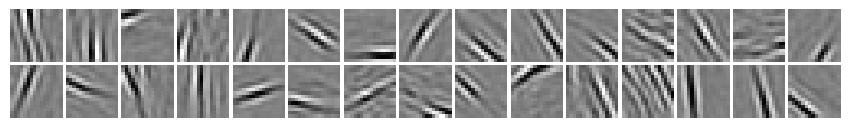

Running variable eta with value 0.0018


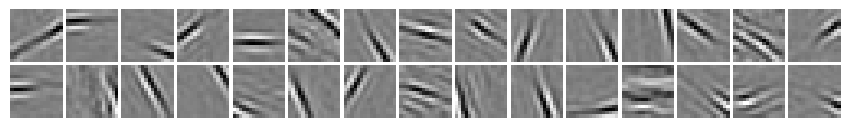

Running variable eta with value 0.0025


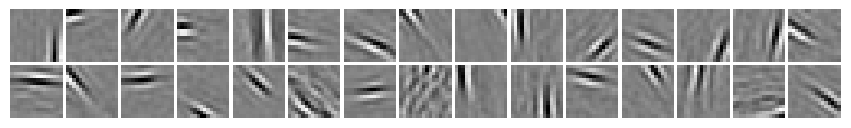

Running variable eta with value 0.0035


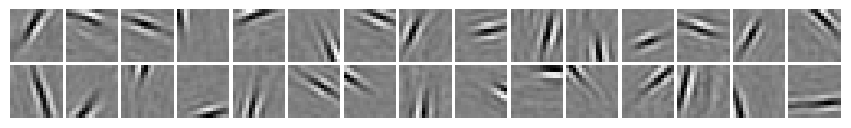

Running variable eta with value 0.0050


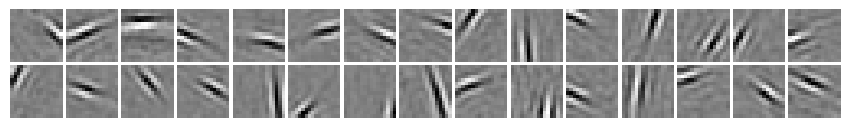

Running variable eta with value 0.0071


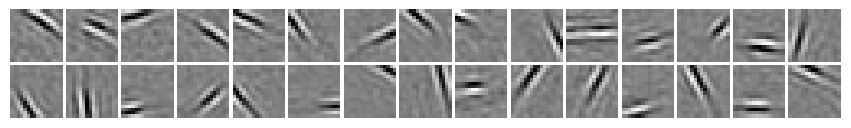

Running variable eta with value 0.0100


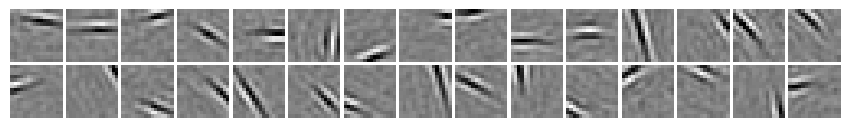

Running variable eta with value 0.0141


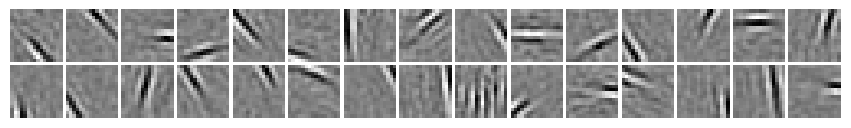

Running variable eta with value 0.0200


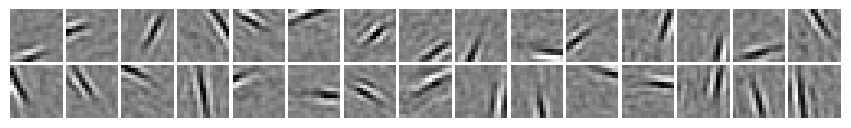

homeo_method= EMP
Running variable eta with value 0.0013


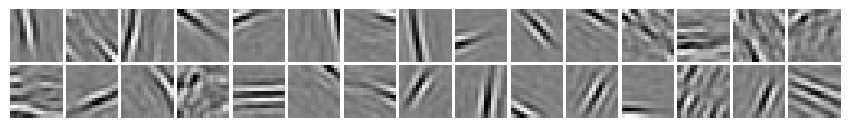

Running variable eta with value 0.0018


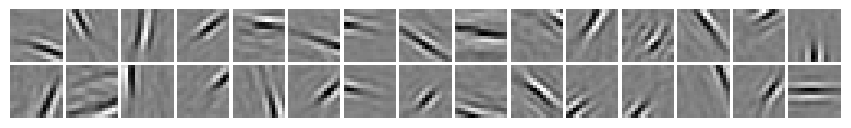

Running variable eta with value 0.0025


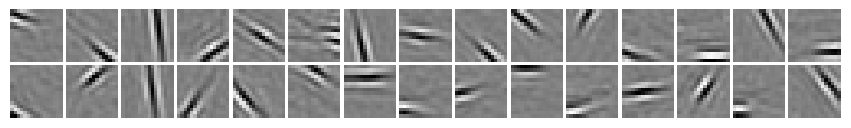

Running variable eta with value 0.0035


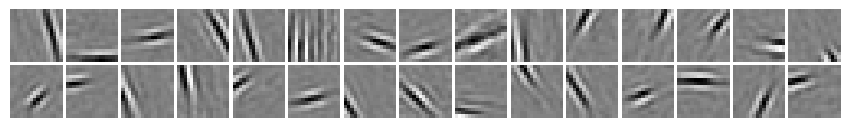

Running variable eta with value 0.0050


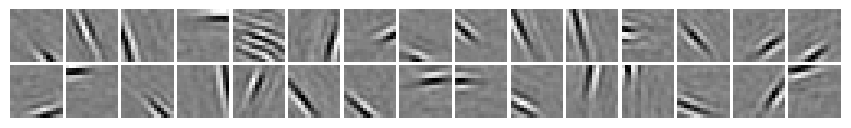

Running variable eta with value 0.0071


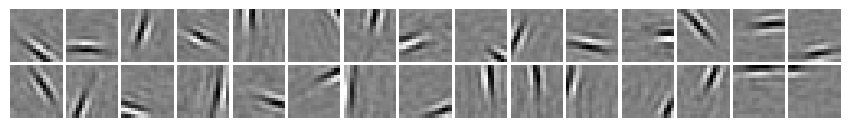

Running variable eta with value 0.0100


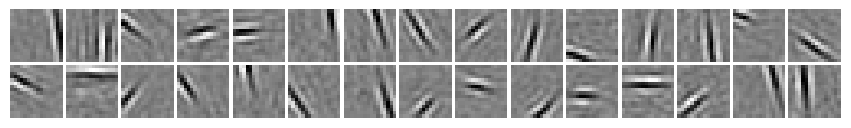

Running variable eta with value 0.0141


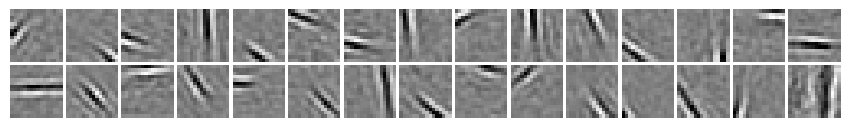

Running variable eta with value 0.0200


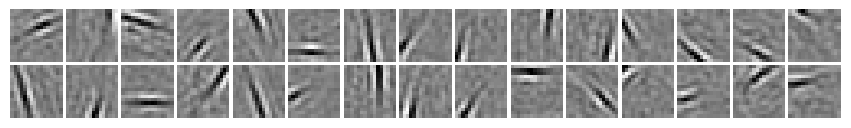

homeo_method= HAP
Running variable eta with value 0.0013


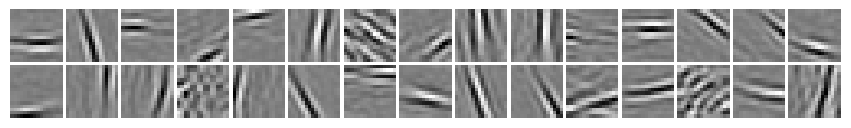

Running variable eta with value 0.0018


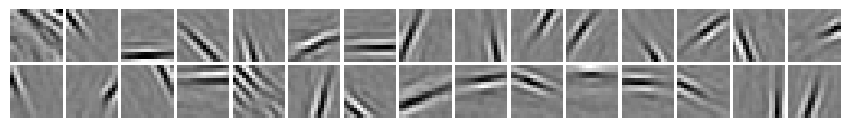

Running variable eta with value 0.0025


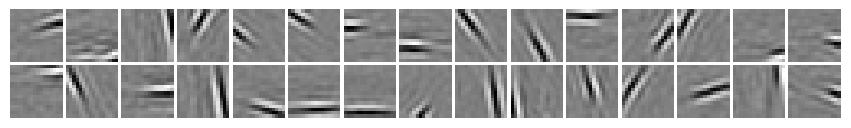

Running variable eta with value 0.0035


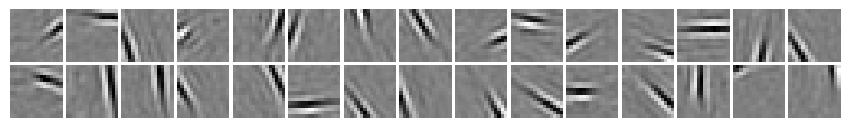

Running variable eta with value 0.0050


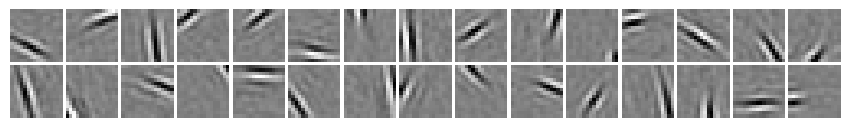

Running variable eta with value 0.0071


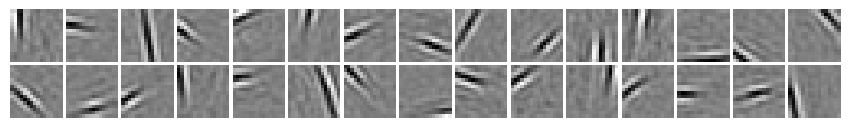

Running variable eta with value 0.0100


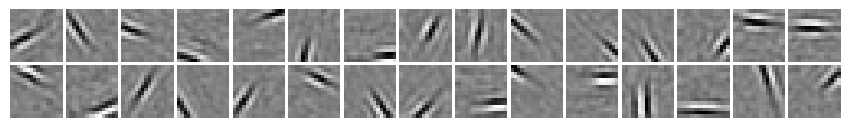

Running variable eta with value 0.0141


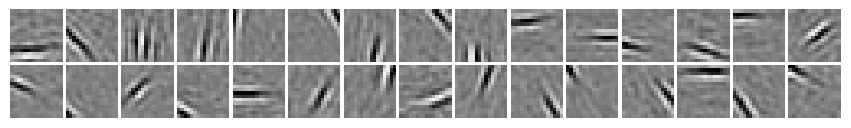

Running variable eta with value 0.0200


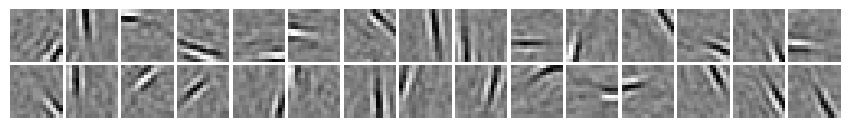

homeo_method= HEH
Running variable eta with value 0.0013


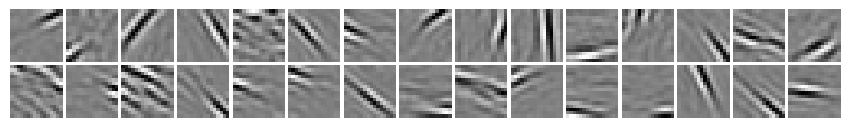

Running variable eta with value 0.0018


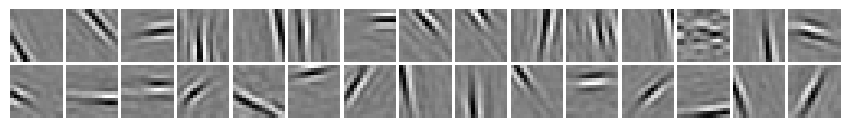

Running variable eta with value 0.0025


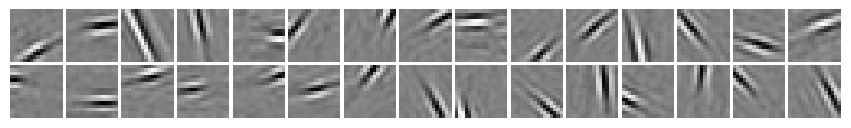

Running variable eta with value 0.0035


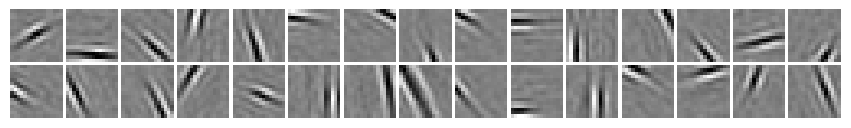

Running variable eta with value 0.0050


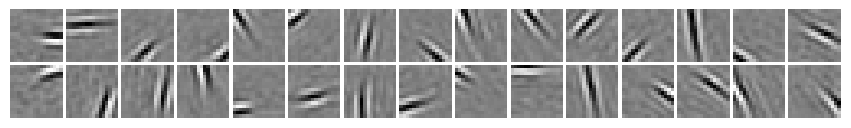

Running variable eta with value 0.0071


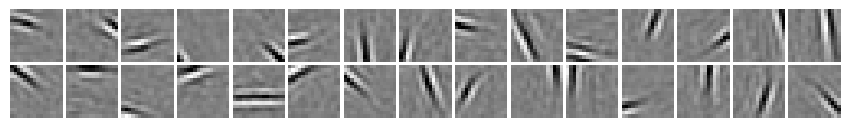

Running variable eta with value 0.0100


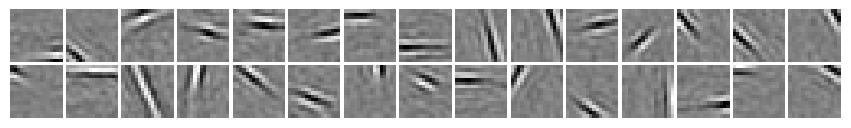

Running variable eta with value 0.0141


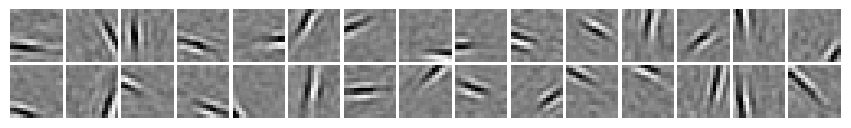

Running variable eta with value 0.0200


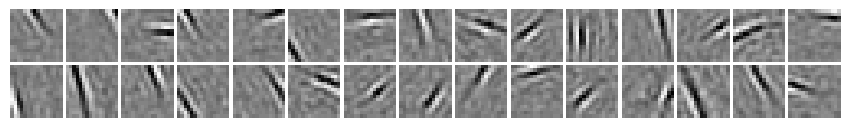

homeo_method= OLS
Running variable eta with value 0.0013


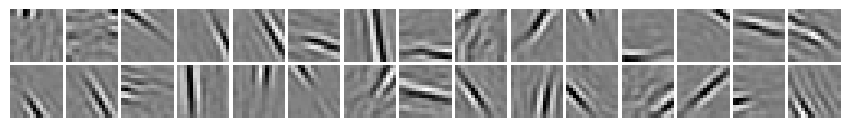

Running variable eta with value 0.0018


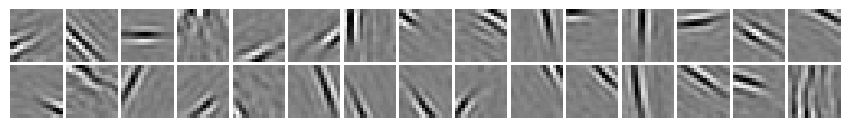

Running variable eta with value 0.0025


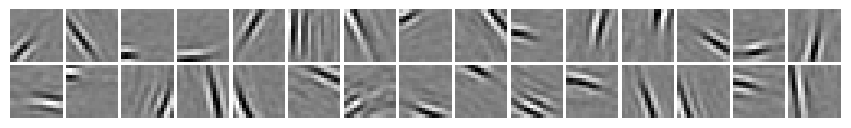

Running variable eta with value 0.0035


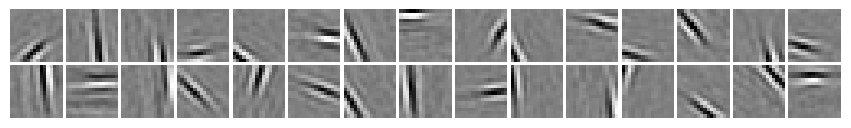

Running variable eta with value 0.0050


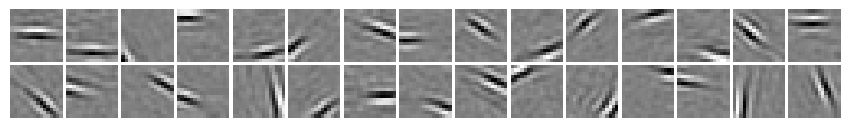

Running variable eta with value 0.0071


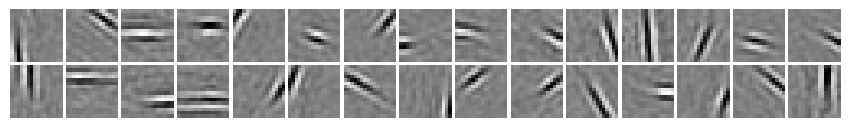

Running variable eta with value 0.0100


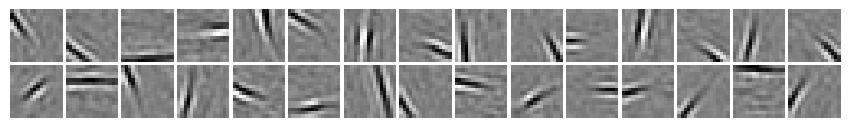

Running variable eta with value 0.0141


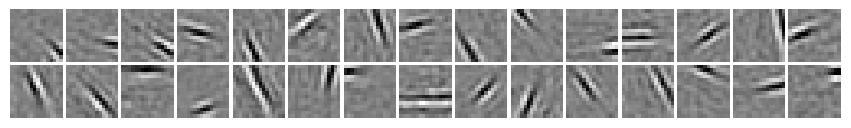

Running variable eta with value 0.0200


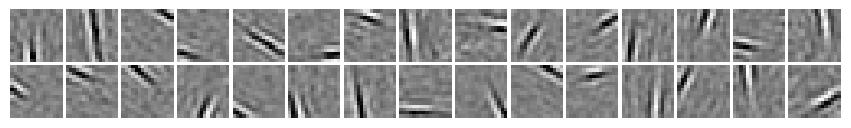

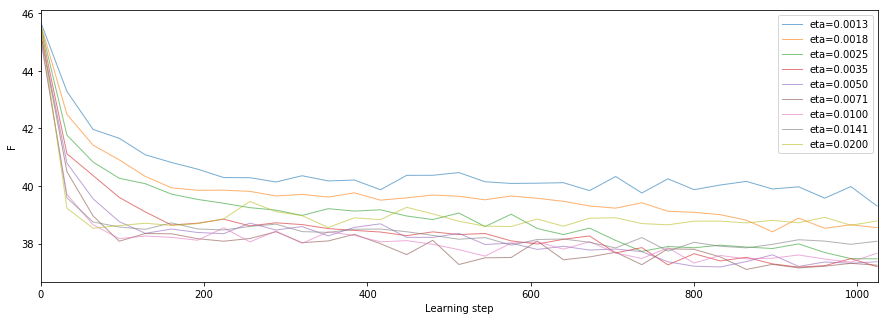

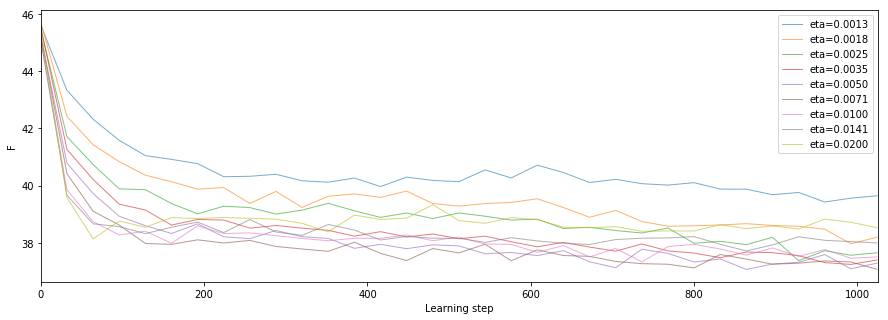

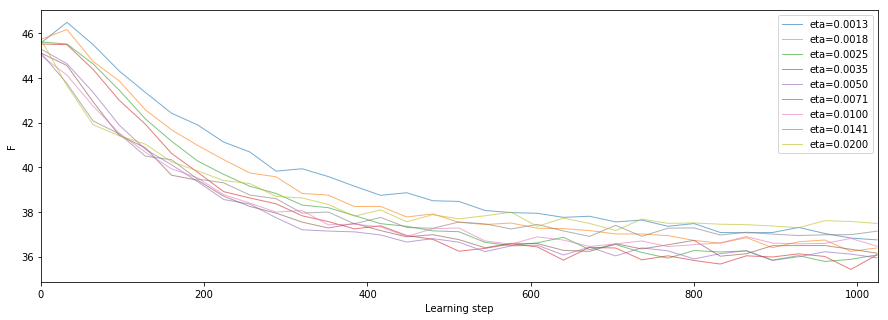

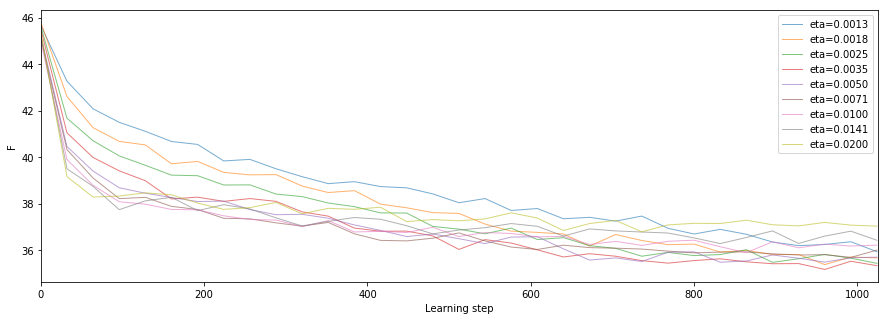

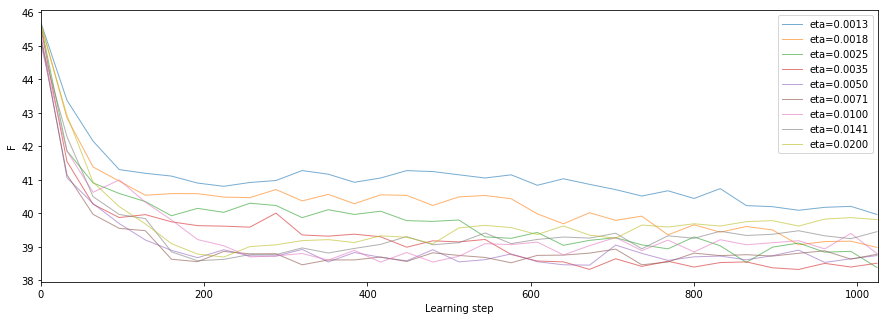

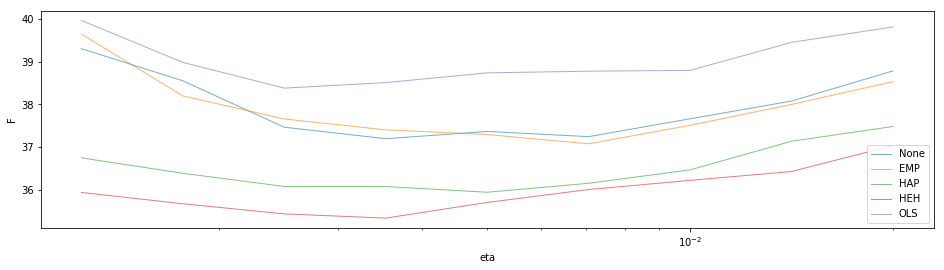

homeo_method= None
Running variable eta_homeo with value 0.0013


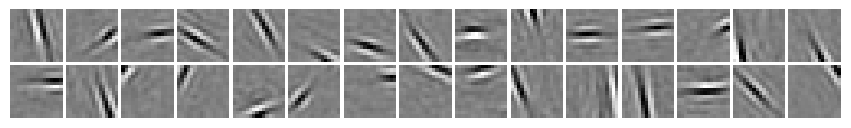

Running variable eta_homeo with value 0.0018


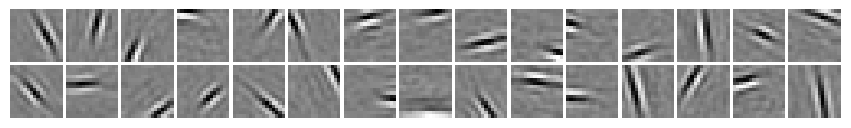

Running variable eta_homeo with value 0.0025


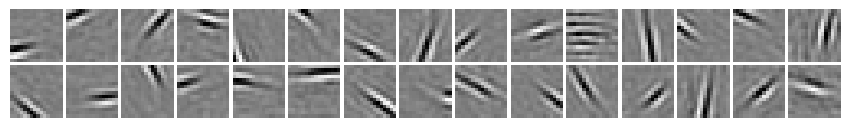

Running variable eta_homeo with value 0.0035


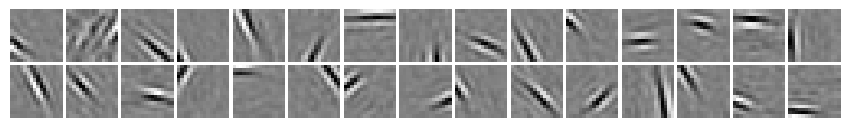

Running variable eta_homeo with value 0.0050


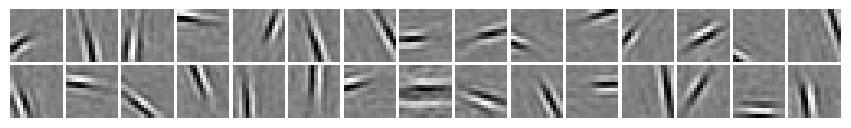

Running variable eta_homeo with value 0.0071


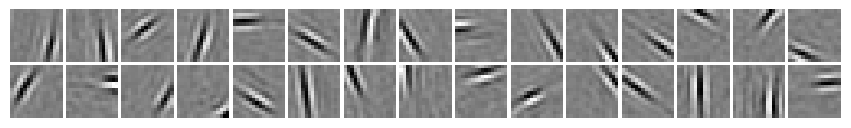

Running variable eta_homeo with value 0.0100


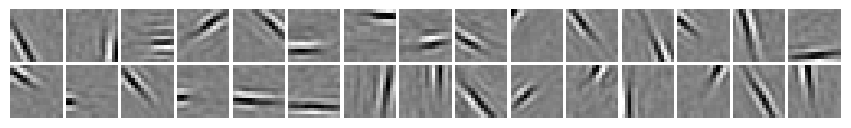

Running variable eta_homeo with value 0.0141


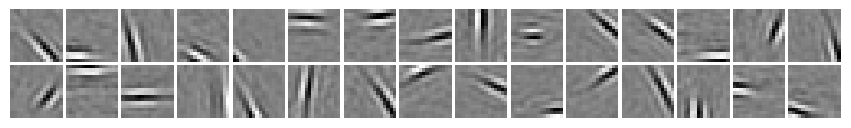

Running variable eta_homeo with value 0.0200


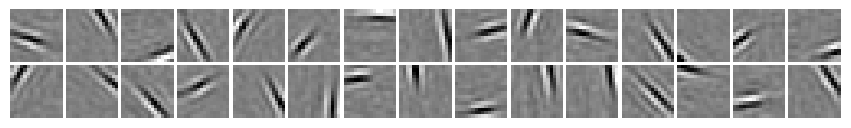

homeo_method= EMP
Running variable eta_homeo with value 0.0013


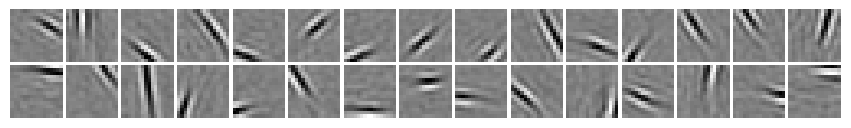

Running variable eta_homeo with value 0.0018


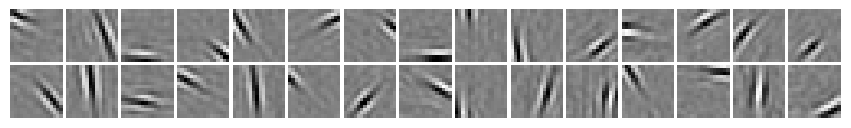

Running variable eta_homeo with value 0.0025


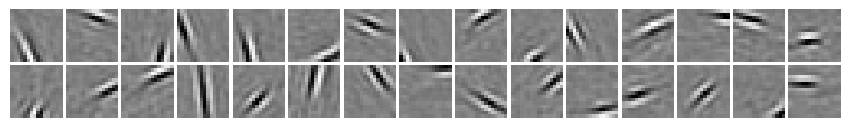

Running variable eta_homeo with value 0.0035


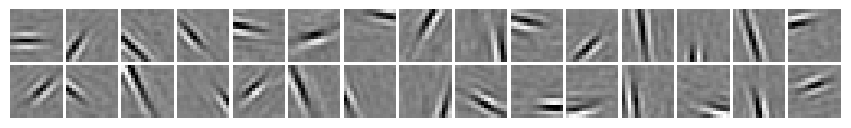

Running variable eta_homeo with value 0.0050


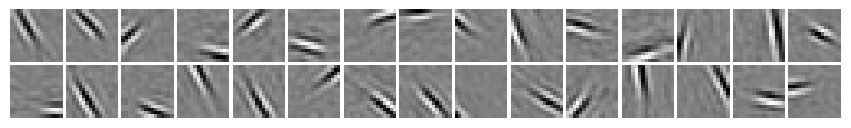

Running variable eta_homeo with value 0.0071


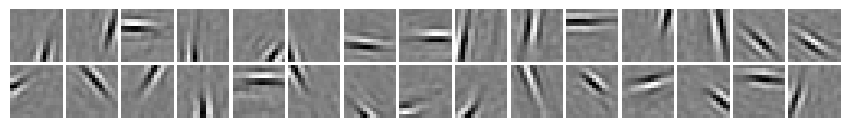

Running variable eta_homeo with value 0.0100


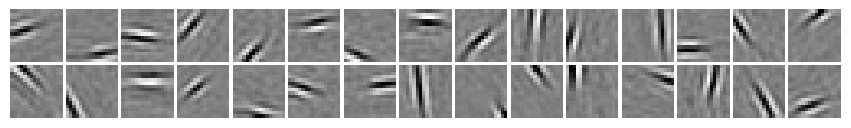

Running variable eta_homeo with value 0.0141


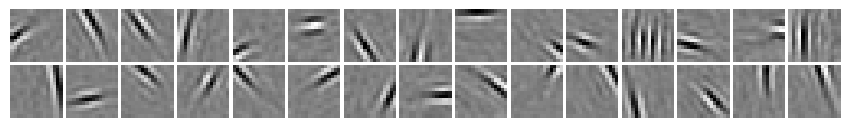

Running variable eta_homeo with value 0.0200


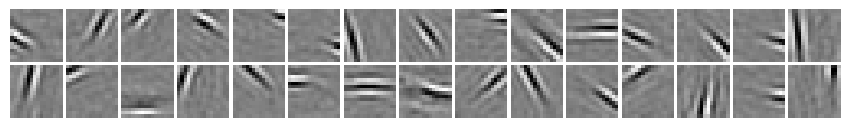

homeo_method= HAP
Running variable eta_homeo with value 0.0013


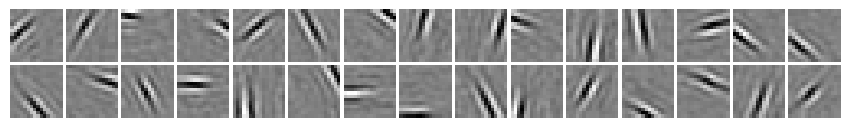

Running variable eta_homeo with value 0.0018


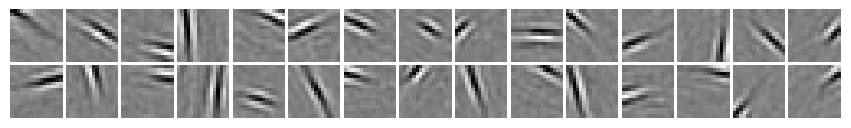

Running variable eta_homeo with value 0.0025


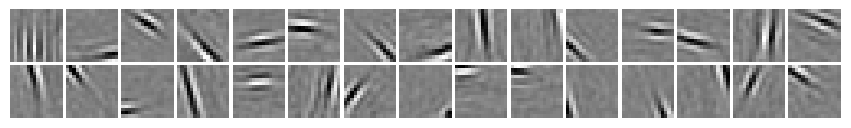

Running variable eta_homeo with value 0.0035


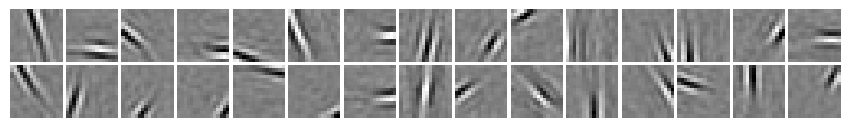

Running variable eta_homeo with value 0.0050


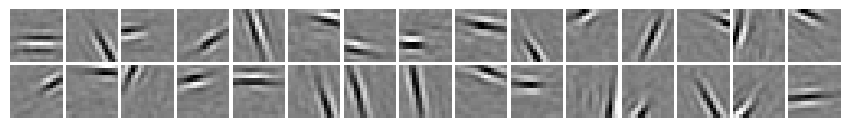

Running variable eta_homeo with value 0.0071


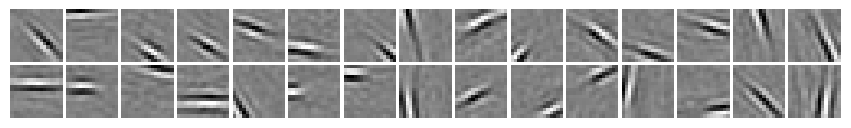

Running variable eta_homeo with value 0.0100


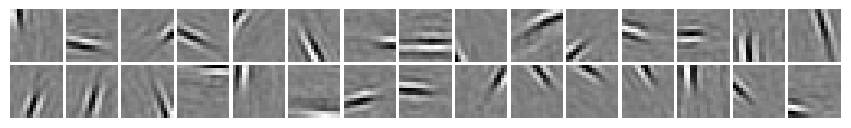

Running variable eta_homeo with value 0.0141


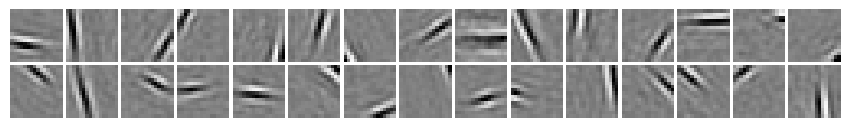

Running variable eta_homeo with value 0.0200


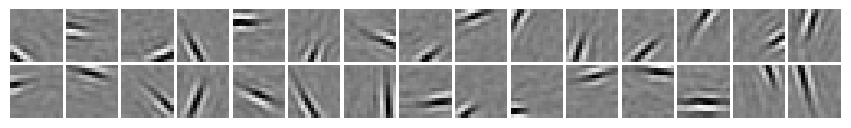

homeo_method= HEH
Running variable eta_homeo with value 0.0013


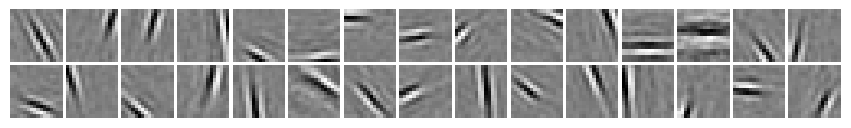

Running variable eta_homeo with value 0.0018


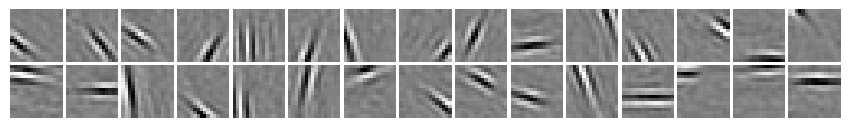

Running variable eta_homeo with value 0.0025


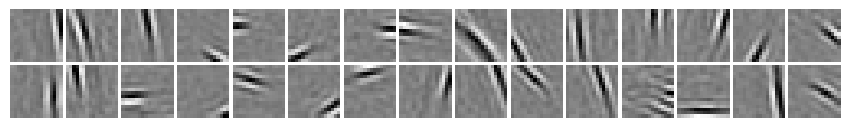

Running variable eta_homeo with value 0.0035


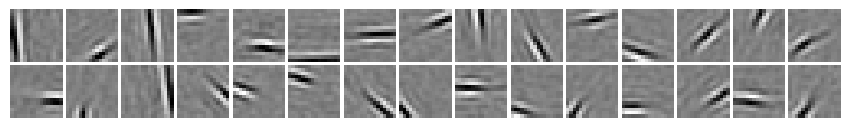

Running variable eta_homeo with value 0.0050


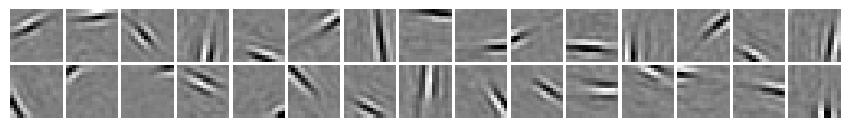

Running variable eta_homeo with value 0.0071


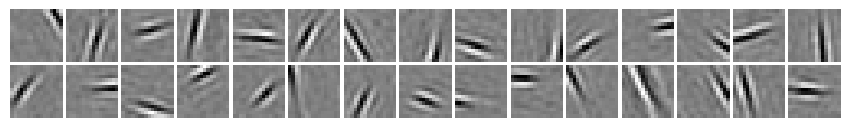

Running variable eta_homeo with value 0.0100


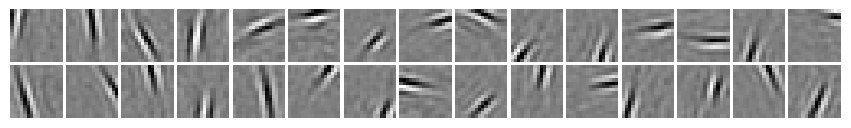

Running variable eta_homeo with value 0.0141


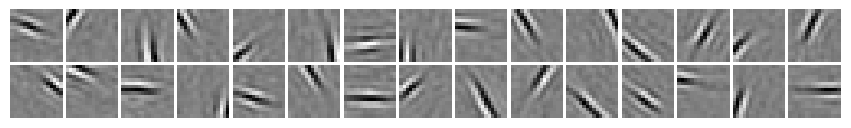

Running variable eta_homeo with value 0.0200


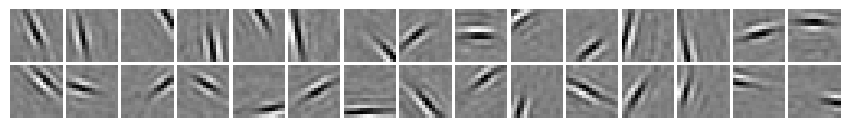

homeo_method= OLS
Running variable eta_homeo with value 0.0013


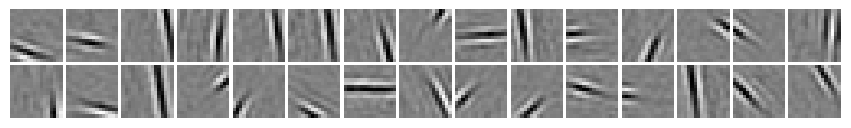

Running variable eta_homeo with value 0.0018


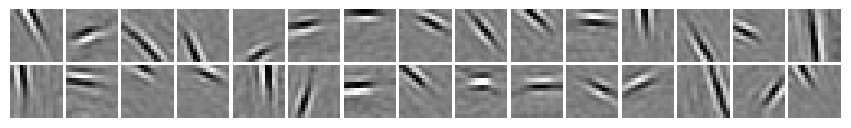

Running variable eta_homeo with value 0.0025


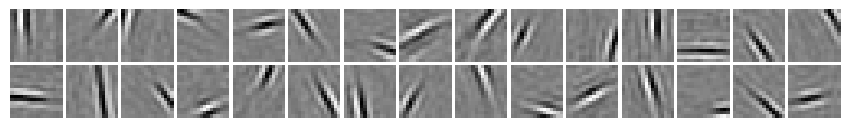

Running variable eta_homeo with value 0.0035


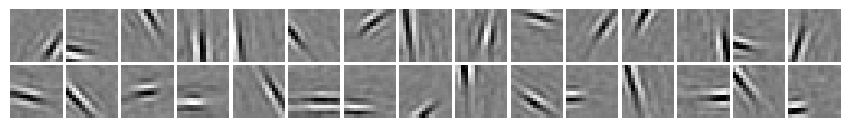

Running variable eta_homeo with value 0.0050


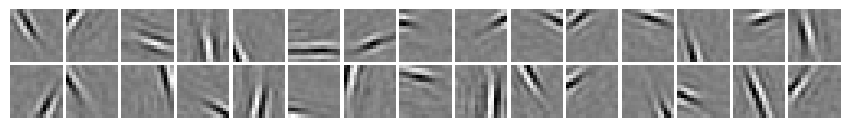

Running variable eta_homeo with value 0.0071


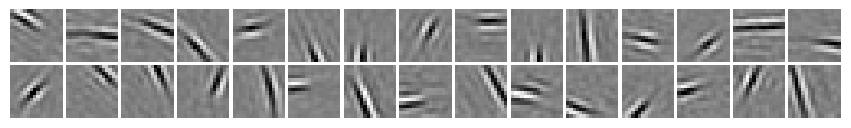

Running variable eta_homeo with value 0.0100


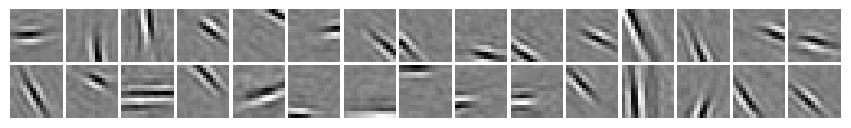

Running variable eta_homeo with value 0.0141


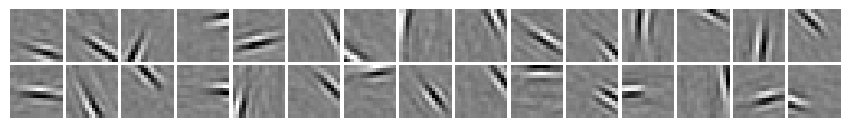

Running variable eta_homeo with value 0.0200


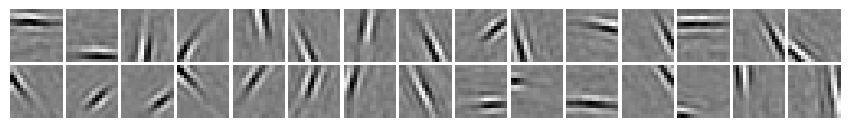

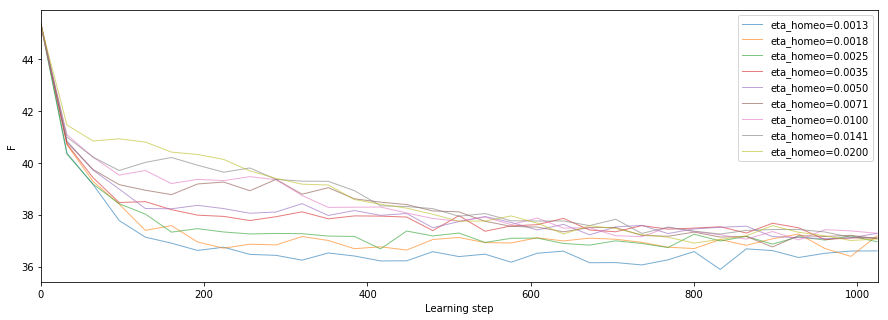

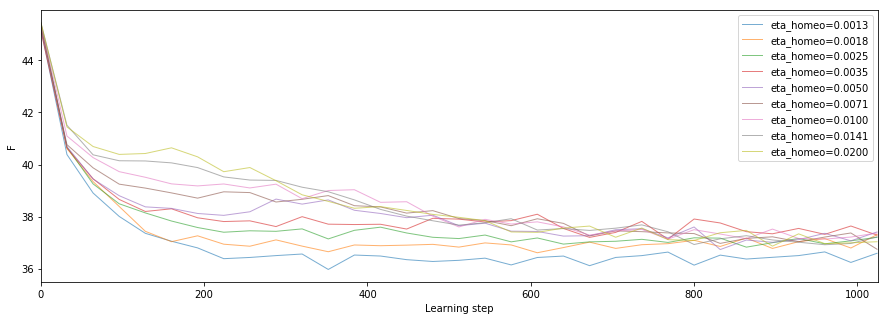

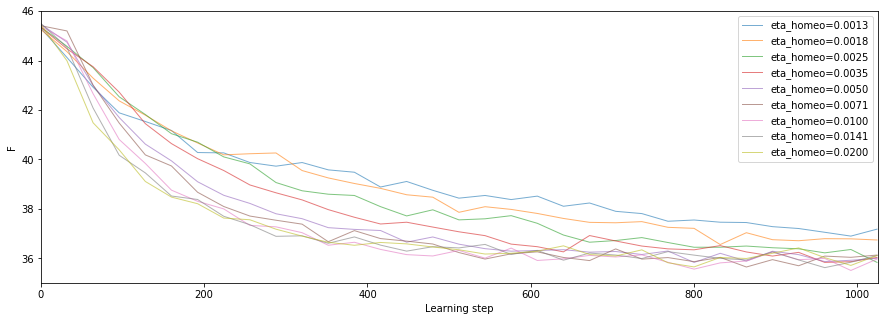

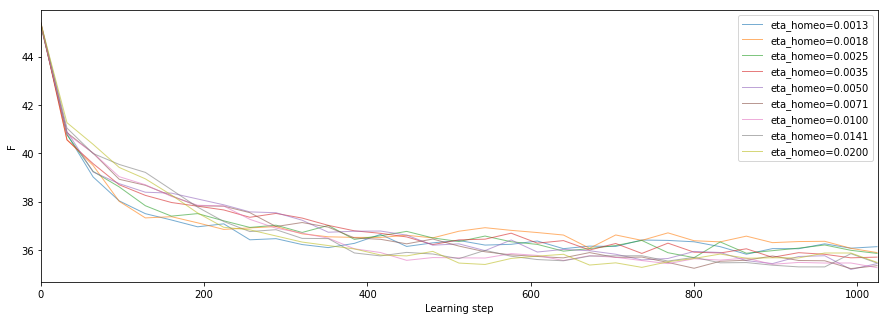

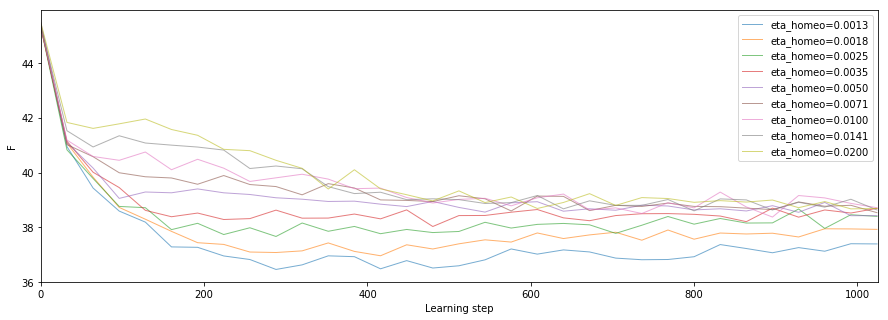

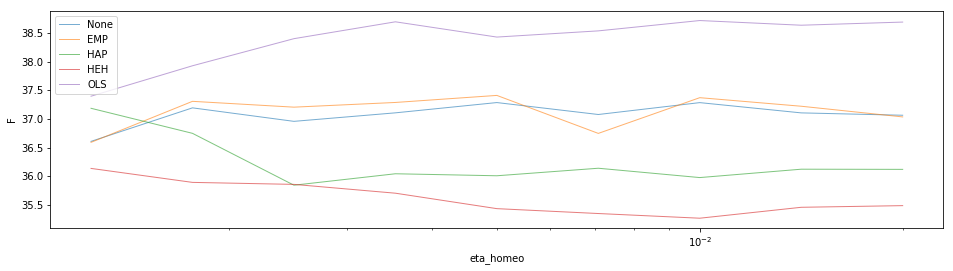

homeo_method= None
Running variable alpha_homeo with value 0.6250


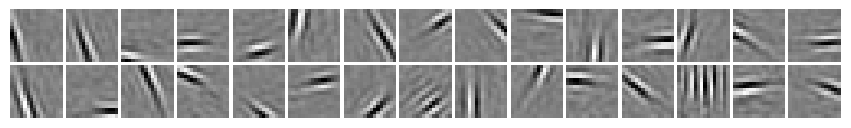

Running variable alpha_homeo with value 0.8839


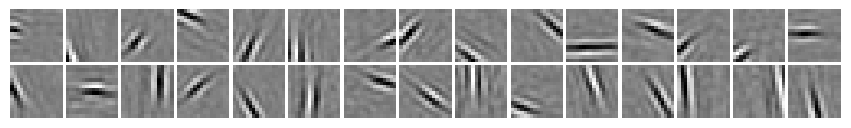

Running variable alpha_homeo with value 1.2500


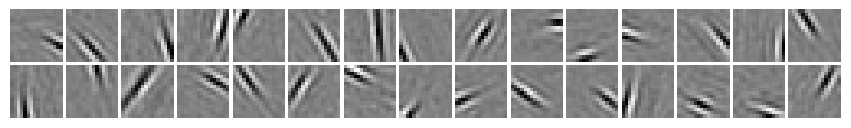

Running variable alpha_homeo with value 1.7678


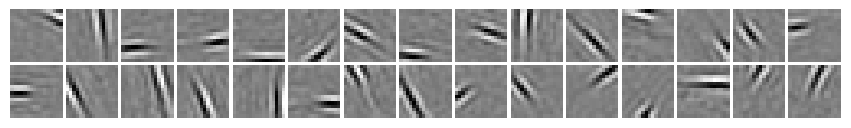

Running variable alpha_homeo with value 2.5000


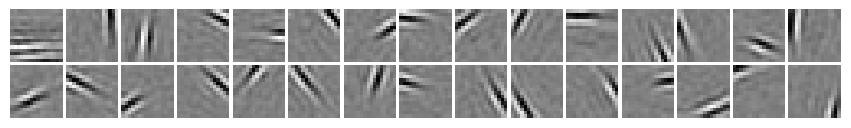

Running variable alpha_homeo with value 3.5355


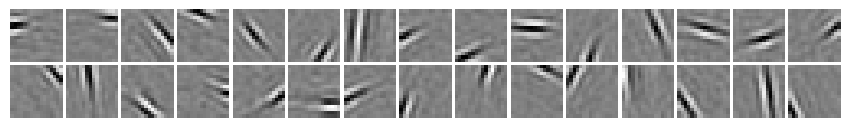

Running variable alpha_homeo with value 5.0000


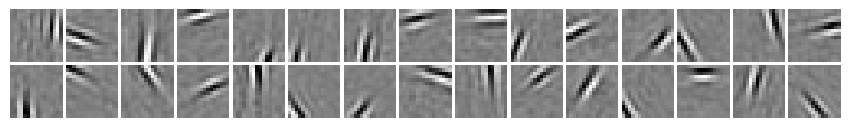

Running variable alpha_homeo with value 7.0711


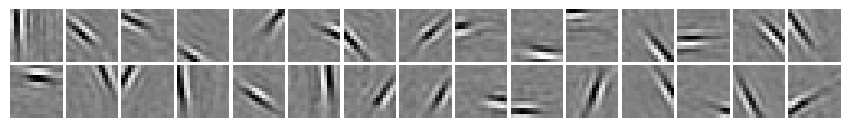

Running variable alpha_homeo with value 10.0000


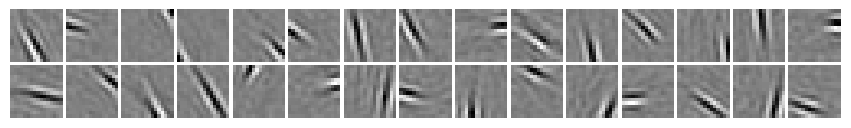

homeo_method= EMP
Running variable alpha_homeo with value 0.6250


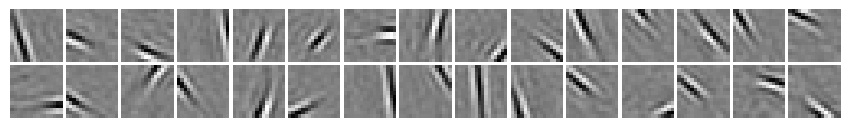

Running variable alpha_homeo with value 0.8839


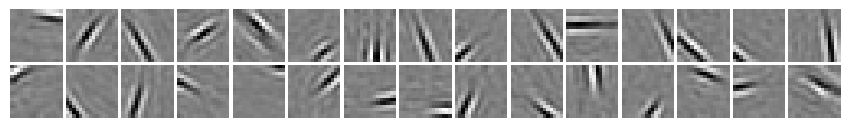

Running variable alpha_homeo with value 1.2500


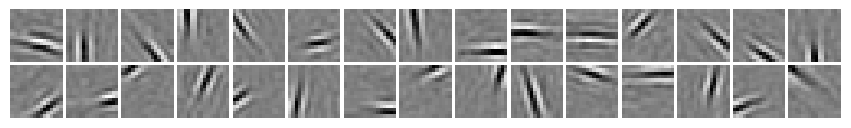

Running variable alpha_homeo with value 1.7678


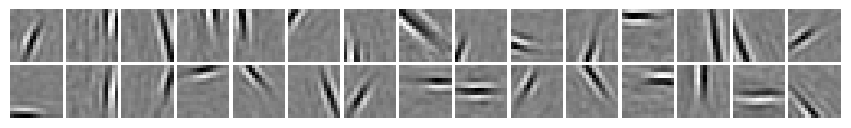

Running variable alpha_homeo with value 2.5000


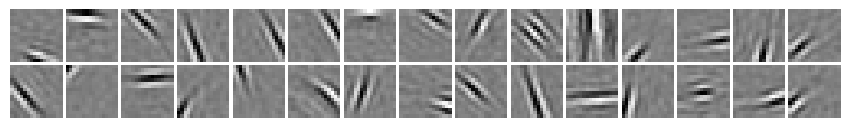

Running variable alpha_homeo with value 3.5355


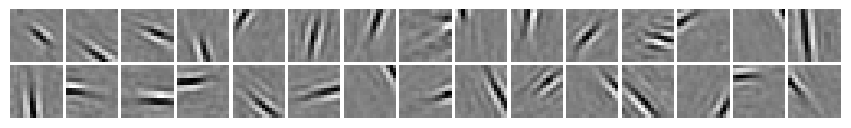

Running variable alpha_homeo with value 5.0000


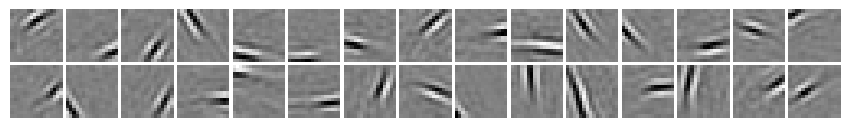

Running variable alpha_homeo with value 7.0711


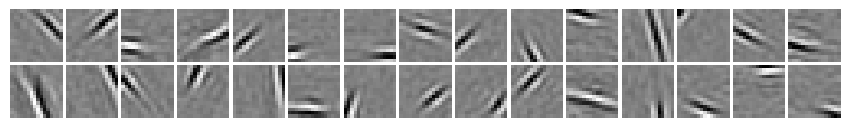

Running variable alpha_homeo with value 10.0000


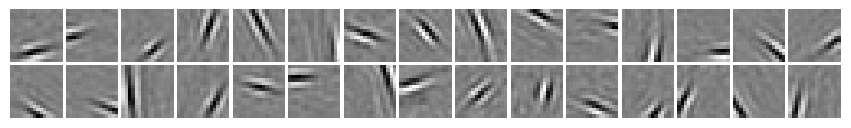

homeo_method= HAP
Running variable alpha_homeo with value 0.6250


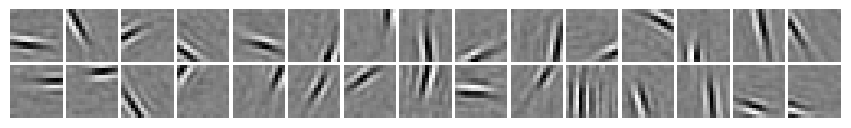

Running variable alpha_homeo with value 0.8839


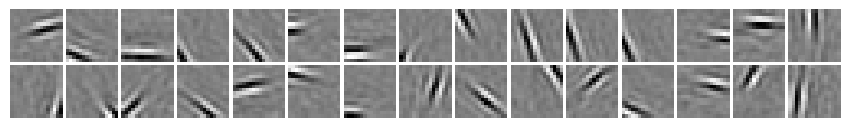

Running variable alpha_homeo with value 1.2500


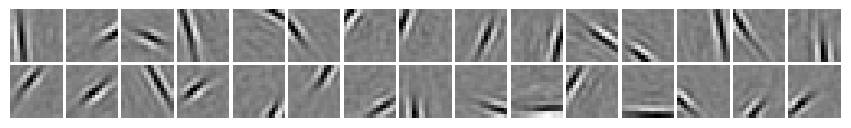

Running variable alpha_homeo with value 1.7678


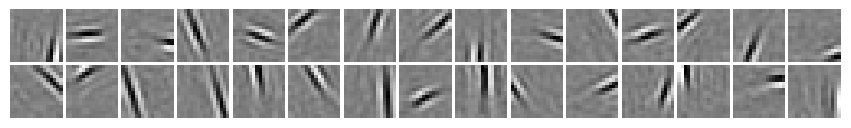

Running variable alpha_homeo with value 2.5000


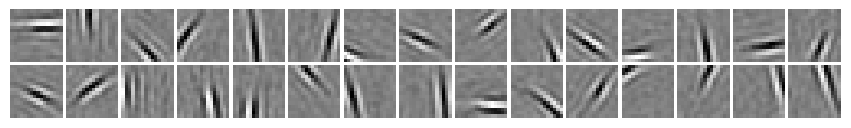

Running variable alpha_homeo with value 3.5355


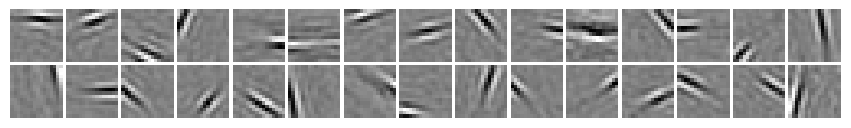

Running variable alpha_homeo with value 5.0000


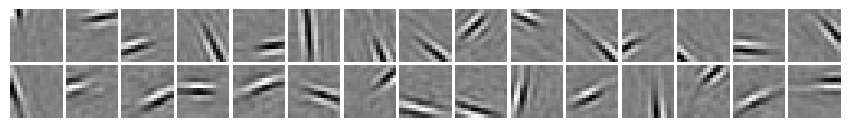

Running variable alpha_homeo with value 7.0711


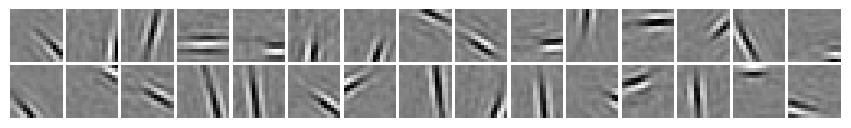

Running variable alpha_homeo with value 10.0000


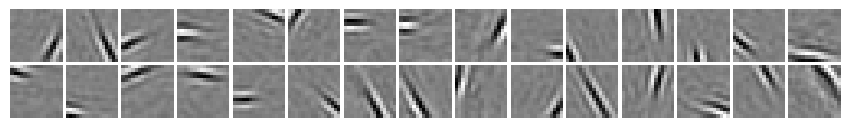

homeo_method= HEH
Running variable alpha_homeo with value 0.6250


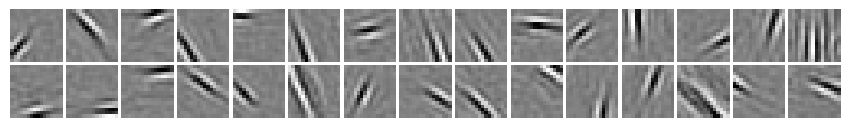

Running variable alpha_homeo with value 0.8839


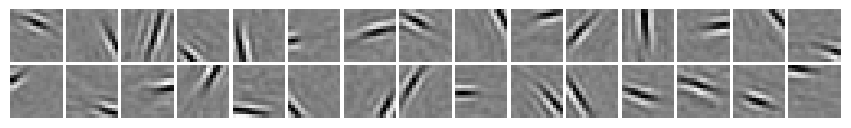

Running variable alpha_homeo with value 1.2500


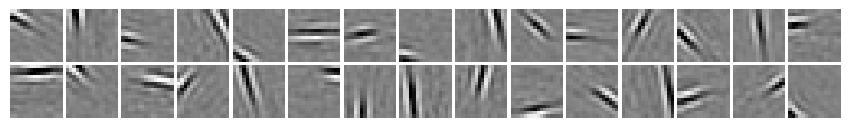

Running variable alpha_homeo with value 1.7678


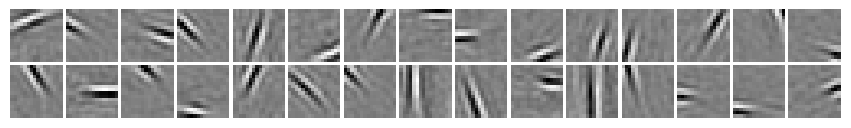

Running variable alpha_homeo with value 2.5000


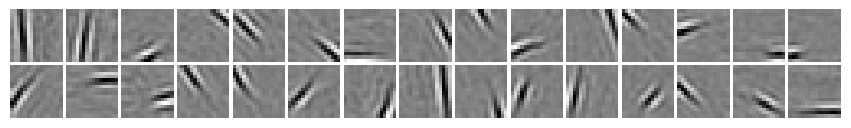

Running variable alpha_homeo with value 3.5355


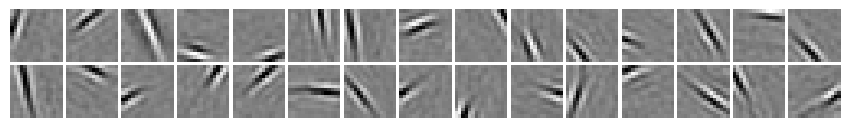

Running variable alpha_homeo with value 5.0000


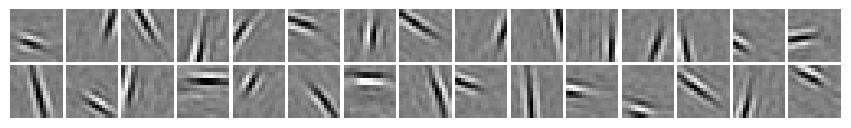

Running variable alpha_homeo with value 7.0711


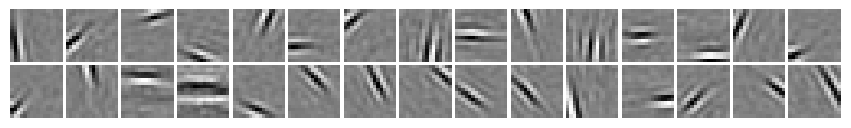

Running variable alpha_homeo with value 10.0000


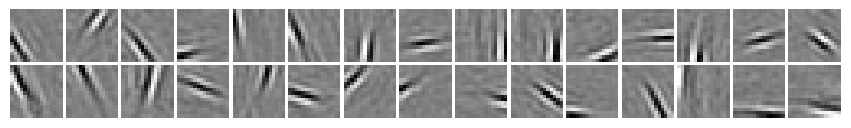

homeo_method= OLS
Running variable alpha_homeo with value 0.6250


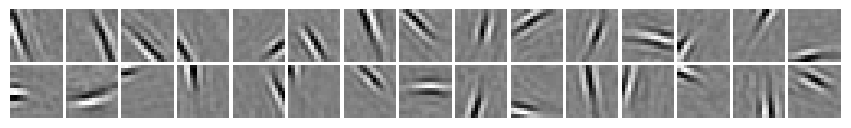

Running variable alpha_homeo with value 0.8839


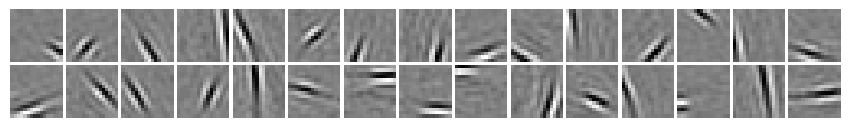

Running variable alpha_homeo with value 1.2500


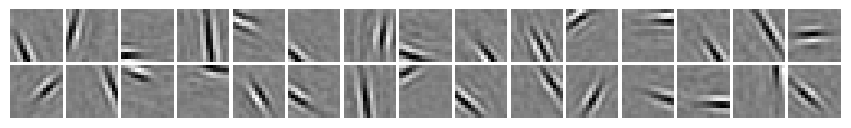

Running variable alpha_homeo with value 1.7678


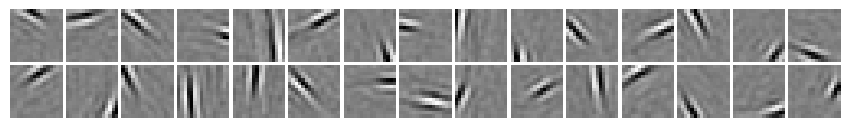

Running variable alpha_homeo with value 2.5000


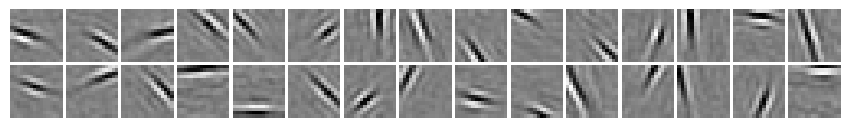

Running variable alpha_homeo with value 3.5355


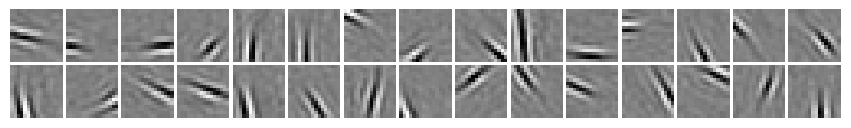

Running variable alpha_homeo with value 5.0000


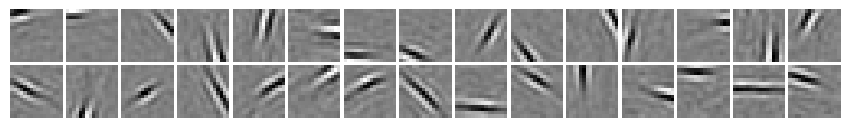

Running variable alpha_homeo with value 7.0711


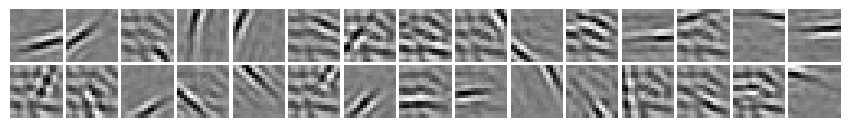

Running variable alpha_homeo with value 10.0000


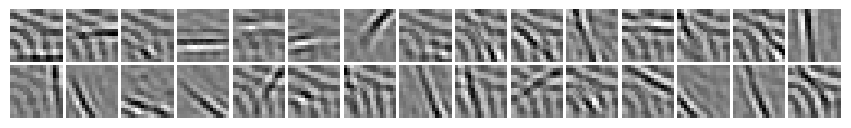

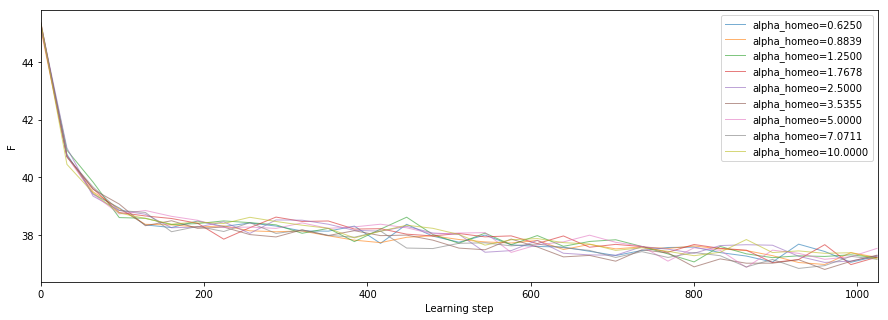

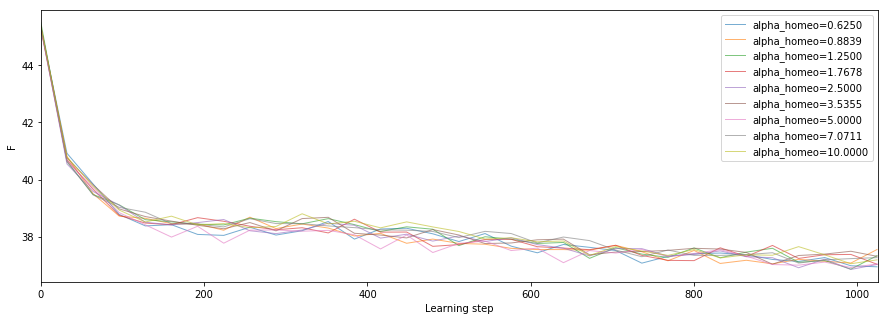

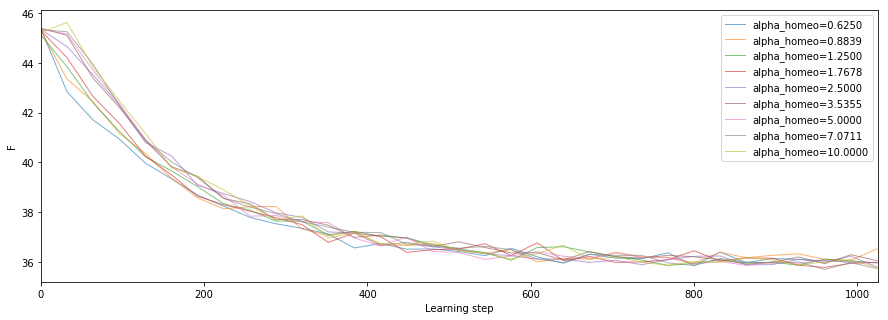

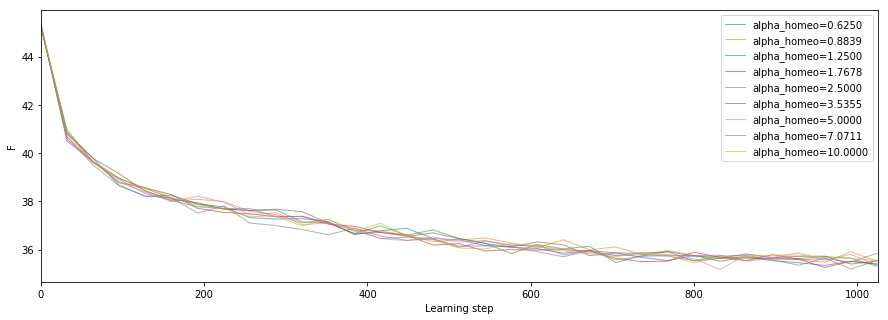

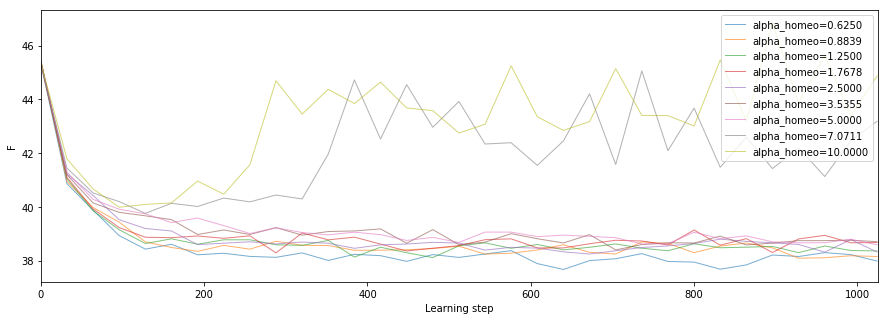

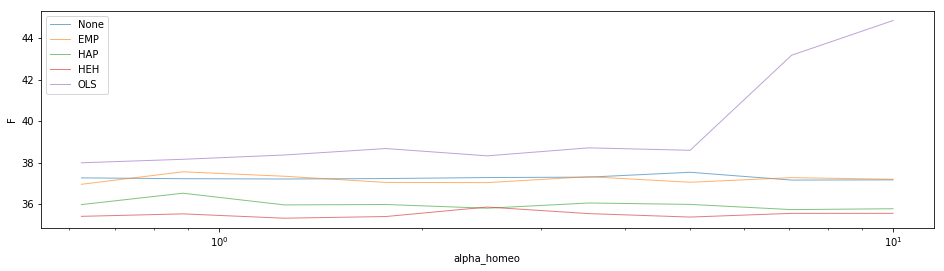

homeo_method= None
Running variable eta_precision with value 0.0001


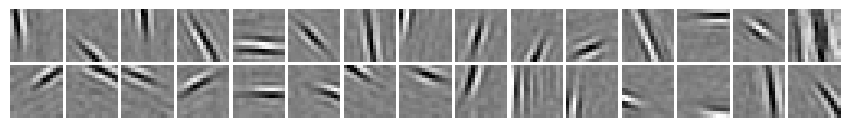

Running variable eta_precision with value 0.0002


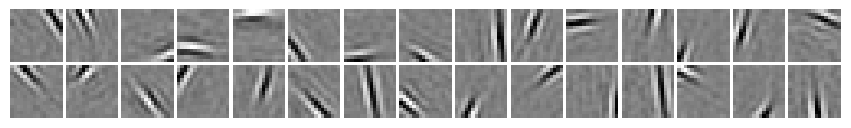

Running variable eta_precision with value 0.0003


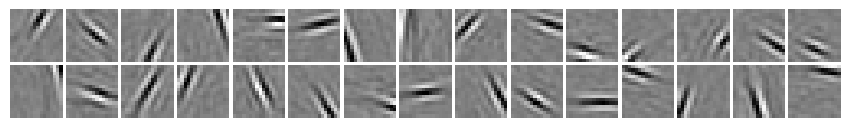

Running variable eta_precision with value 0.0004


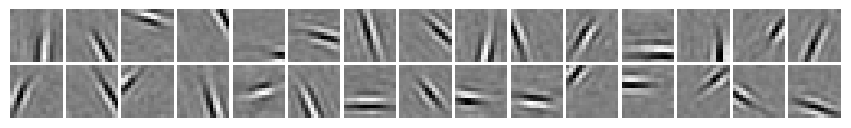

Running variable eta_precision with value 0.0005


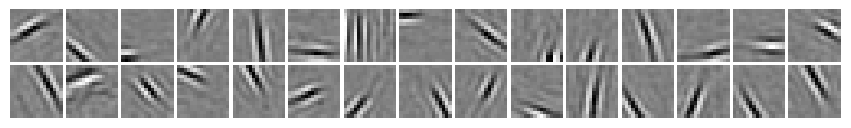

Running variable eta_precision with value 0.0007


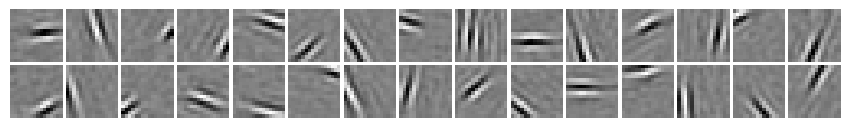

Running variable eta_precision with value 0.0010


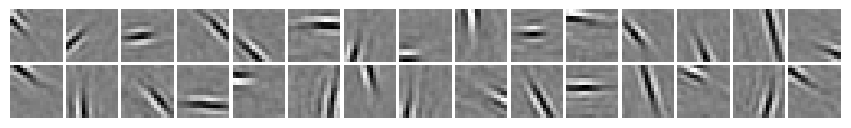

Running variable eta_precision with value 0.0014


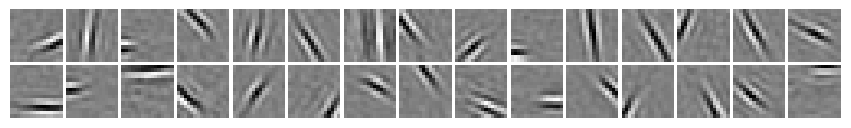

Running variable eta_precision with value 0.0020


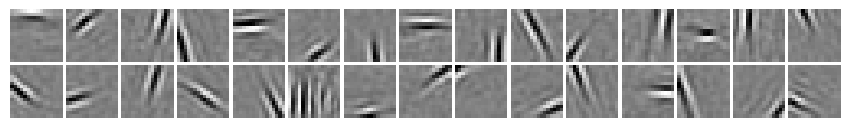

homeo_method= EMP
Running variable eta_precision with value 0.0001


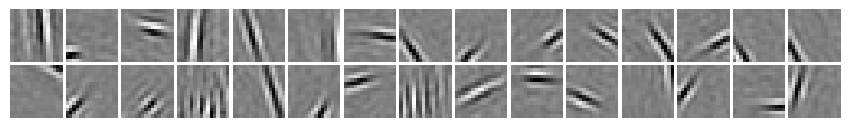

Running variable eta_precision with value 0.0002


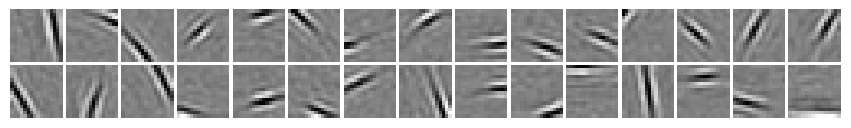

Running variable eta_precision with value 0.0003


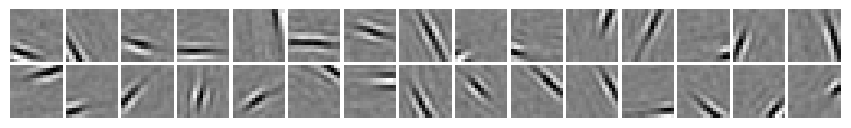

Running variable eta_precision with value 0.0004


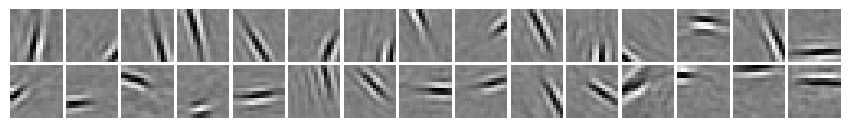

Running variable eta_precision with value 0.0005


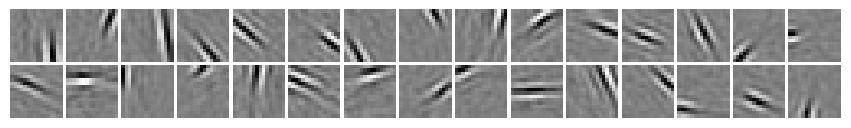

Running variable eta_precision with value 0.0007


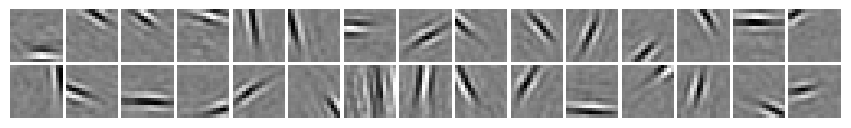

Running variable eta_precision with value 0.0010


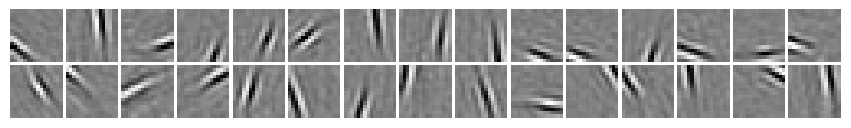

Running variable eta_precision with value 0.0014


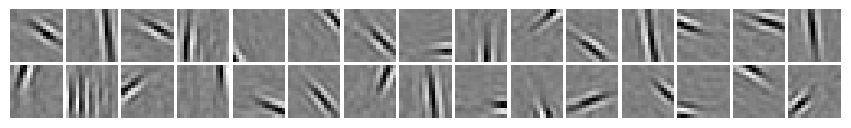

Running variable eta_precision with value 0.0020


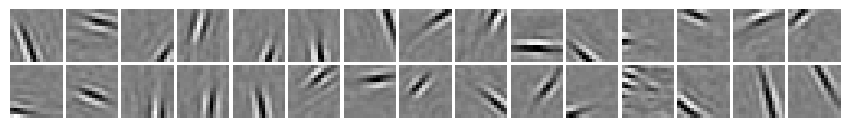

homeo_method= HAP
Running variable eta_precision with value 0.0001


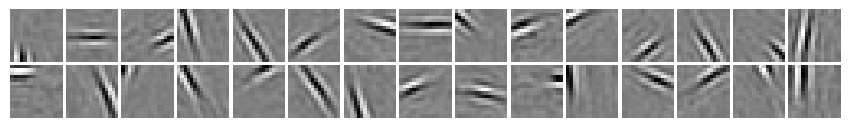

Running variable eta_precision with value 0.0002


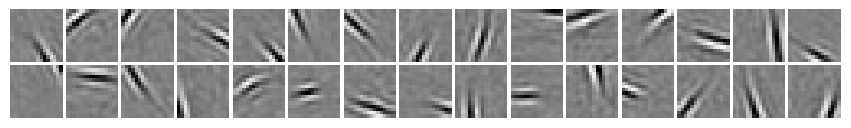

Running variable eta_precision with value 0.0003


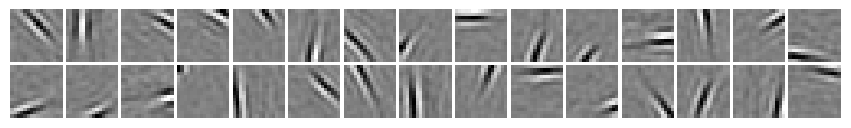

Running variable eta_precision with value 0.0004


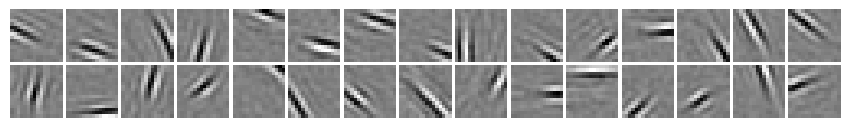

Running variable eta_precision with value 0.0005


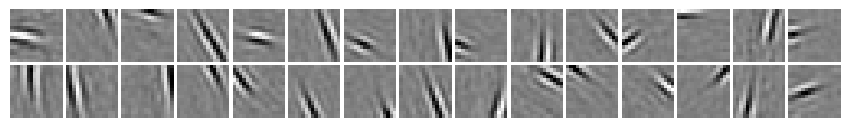

Running variable eta_precision with value 0.0007


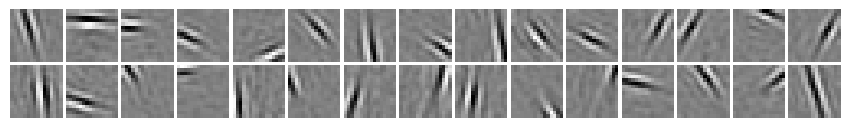

Running variable eta_precision with value 0.0010


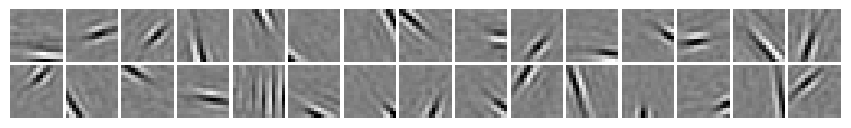

Running variable eta_precision with value 0.0014


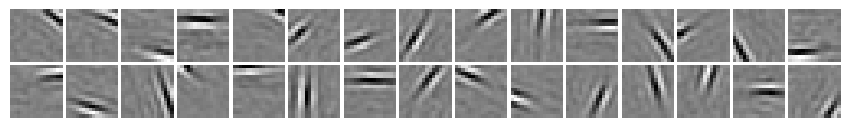

Running variable eta_precision with value 0.0020


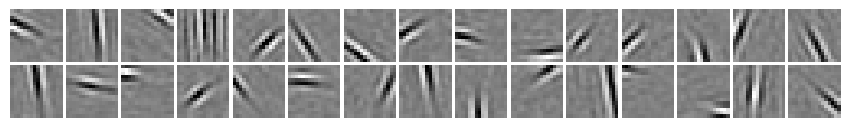

homeo_method= HEH
Running variable eta_precision with value 0.0001


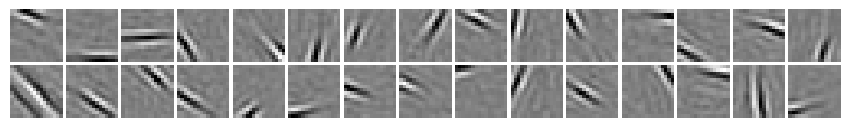

Running variable eta_precision with value 0.0002


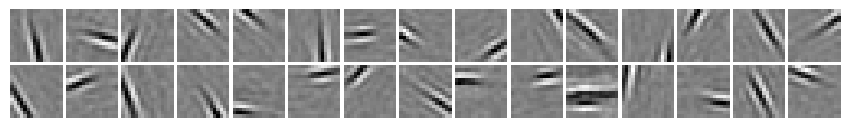

Running variable eta_precision with value 0.0003


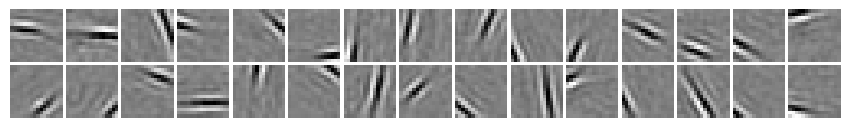

Running variable eta_precision with value 0.0004


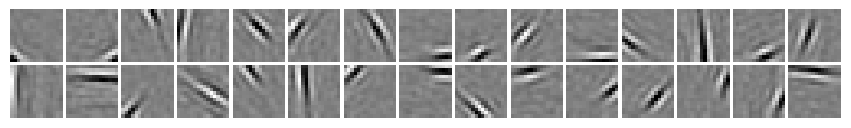

Running variable eta_precision with value 0.0005


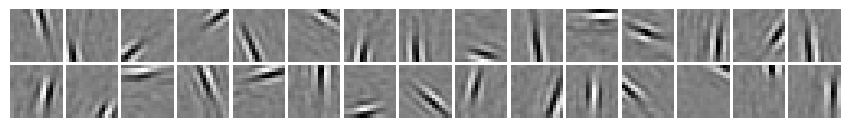

Running variable eta_precision with value 0.0007


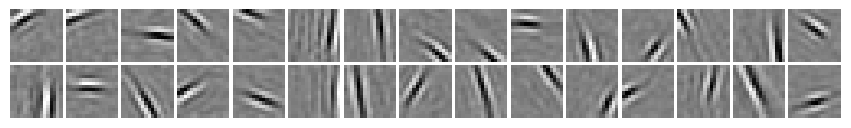

Running variable eta_precision with value 0.0010


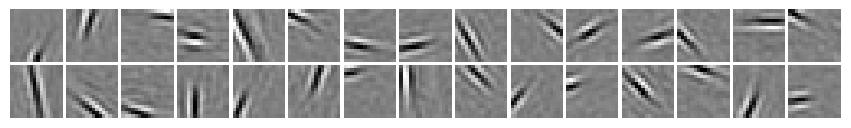

Running variable eta_precision with value 0.0014


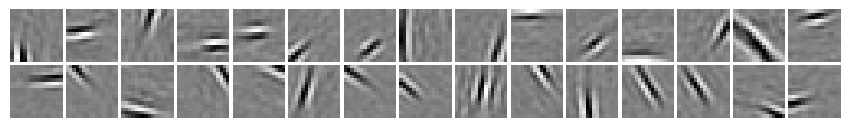

Running variable eta_precision with value 0.0020


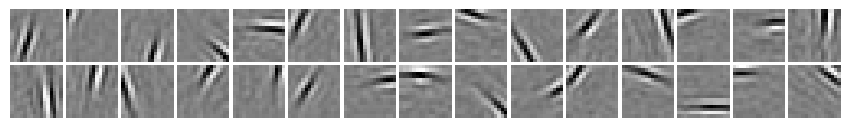

homeo_method= OLS
Running variable eta_precision with value 0.0001


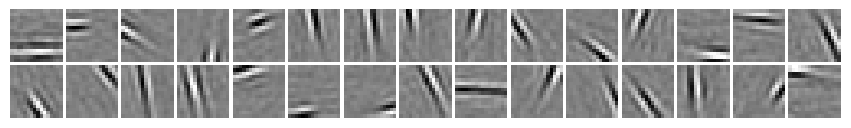

Running variable eta_precision with value 0.0002


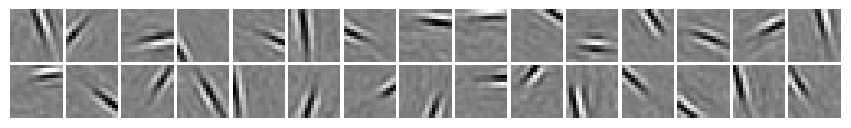

Running variable eta_precision with value 0.0003


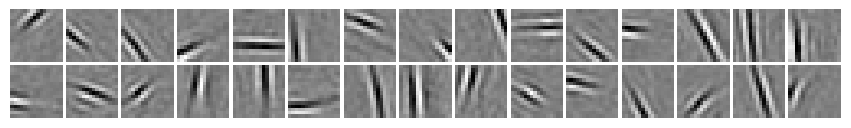

Running variable eta_precision with value 0.0004


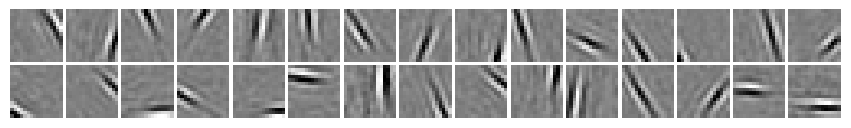

Running variable eta_precision with value 0.0005


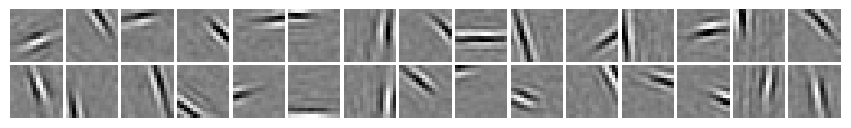

Running variable eta_precision with value 0.0007


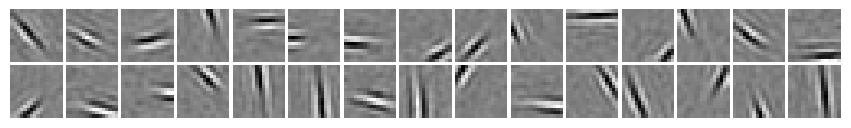

Running variable eta_precision with value 0.0010


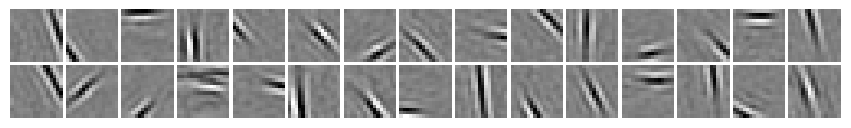

Running variable eta_precision with value 0.0014


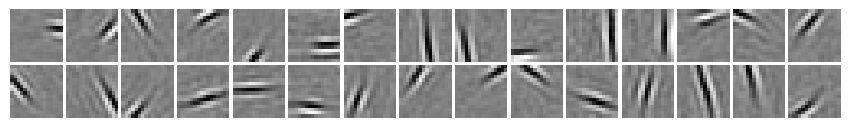

Running variable eta_precision with value 0.0020


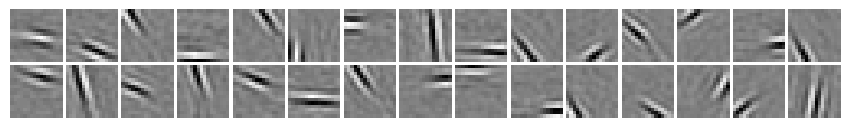

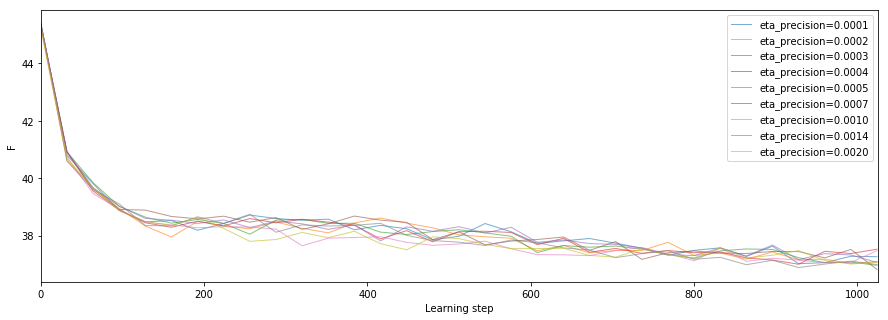

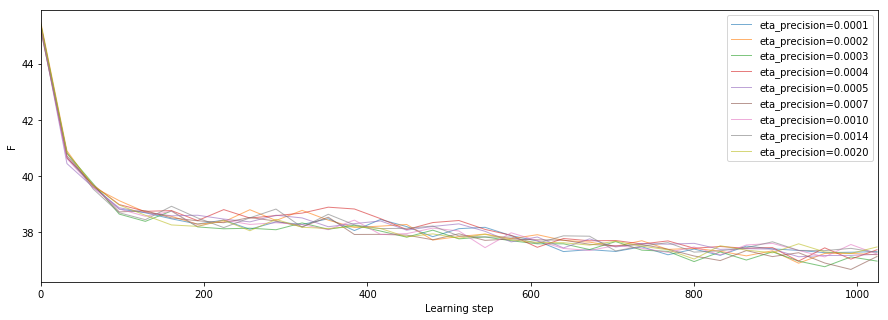

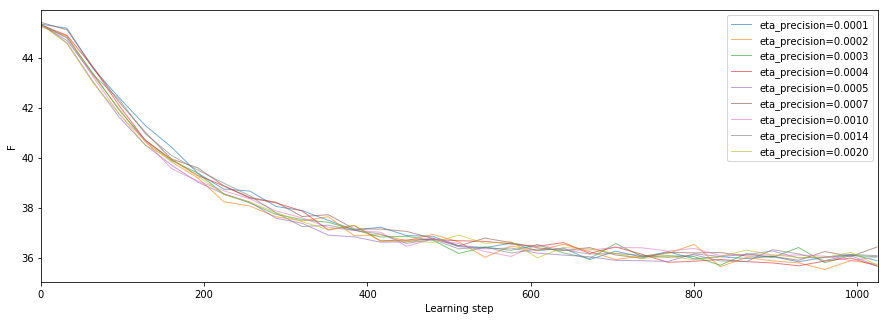

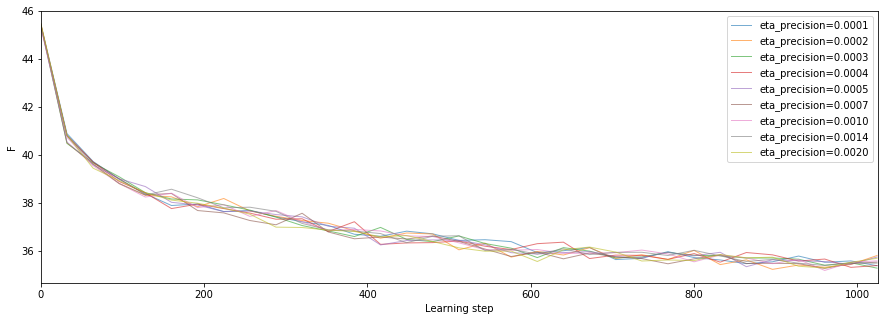

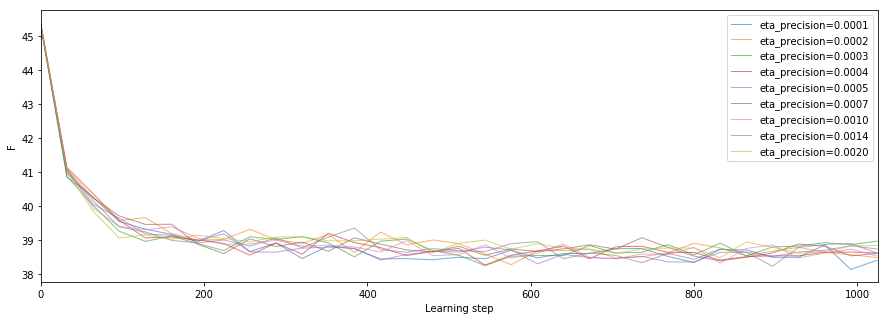

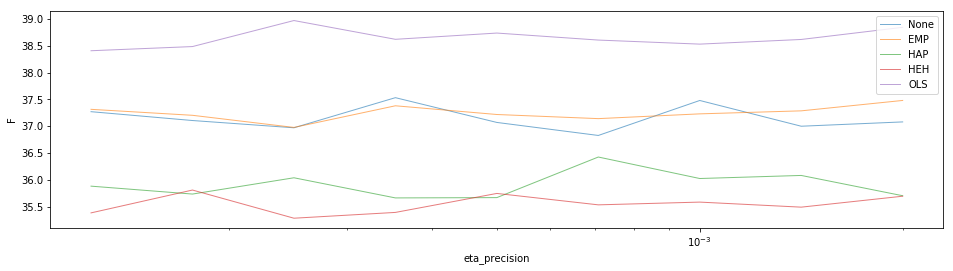

homeo_method= None
Running variable alpha_MP with value 0.2500


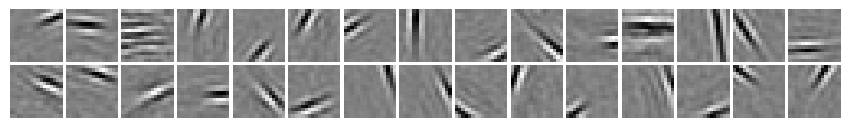

Running variable alpha_MP with value 0.2973


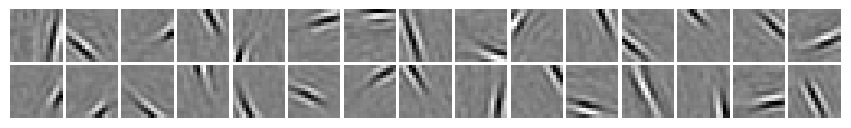

Running variable alpha_MP with value 0.3536


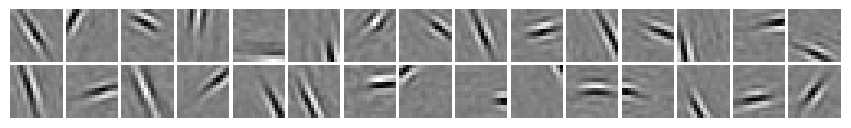

Running variable alpha_MP with value 0.4204


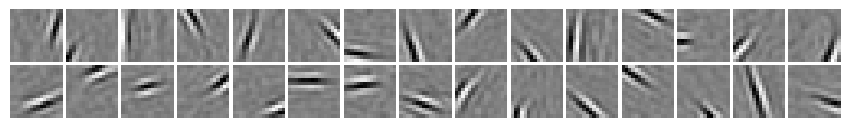

Running variable alpha_MP with value 0.5000


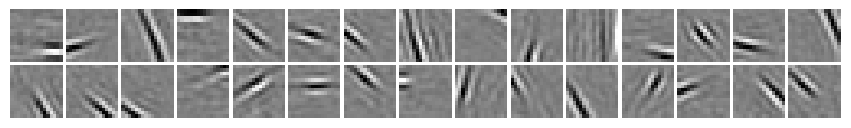

Running variable alpha_MP with value 0.5946


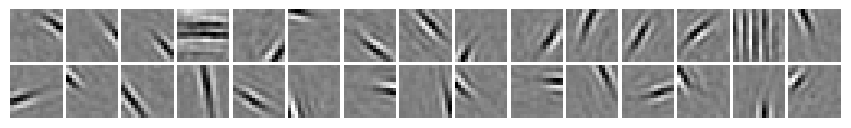

Running variable alpha_MP with value 0.7071


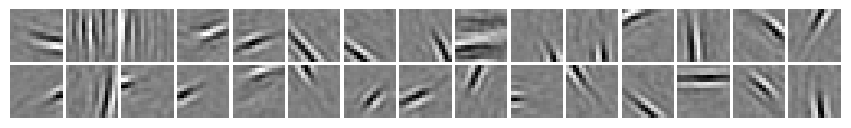

Running variable alpha_MP with value 0.8409


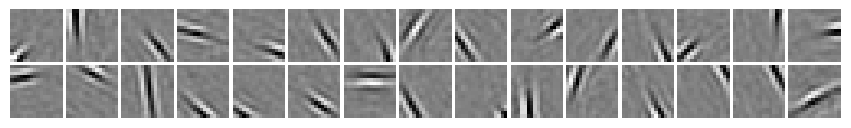

Running variable alpha_MP with value 1.0000


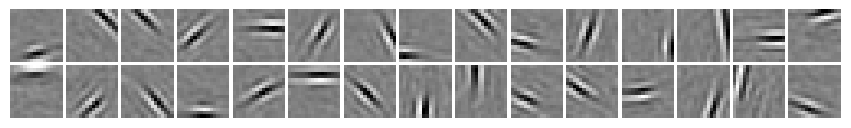

homeo_method= EMP
Running variable alpha_MP with value 0.2500


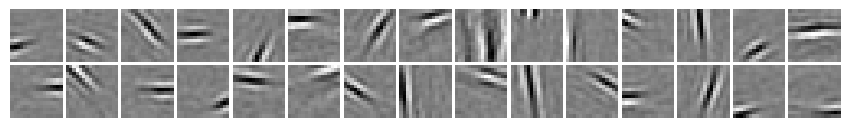

Running variable alpha_MP with value 0.2973


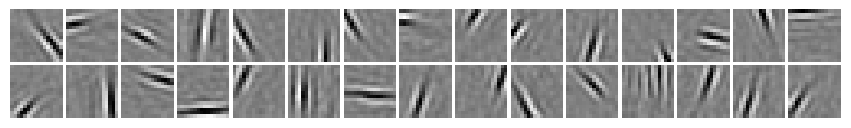

Running variable alpha_MP with value 0.3536


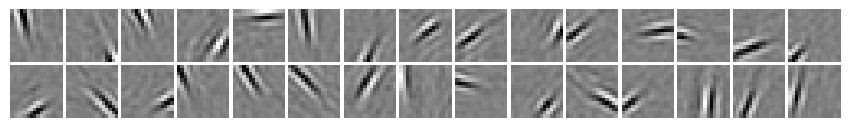

Running variable alpha_MP with value 0.4204


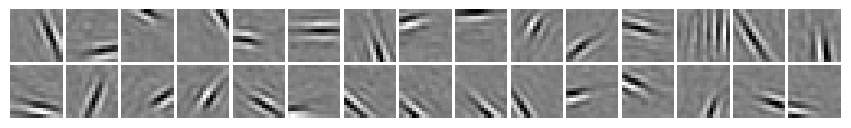

Running variable alpha_MP with value 0.5000


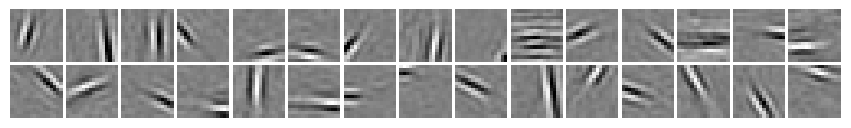

Running variable alpha_MP with value 0.5946


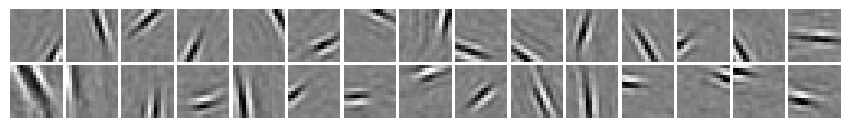

Running variable alpha_MP with value 0.7071


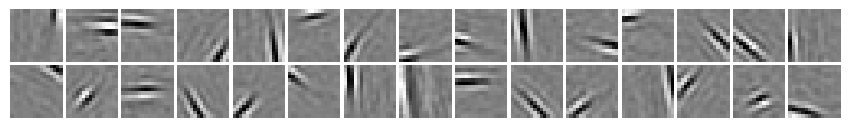

Running variable alpha_MP with value 0.8409


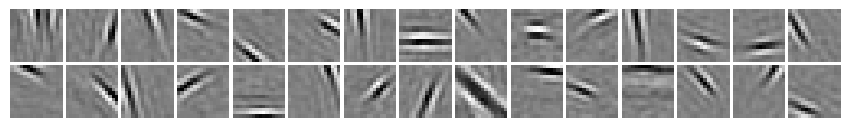

Running variable alpha_MP with value 1.0000


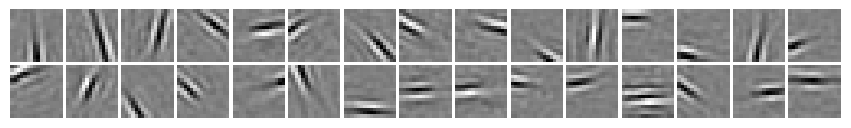

homeo_method= HAP
Running variable alpha_MP with value 0.2500


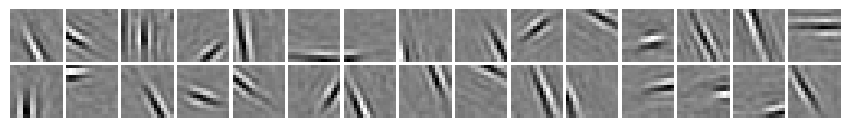

Running variable alpha_MP with value 0.2973


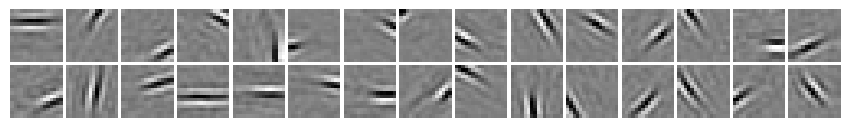

Running variable alpha_MP with value 0.3536


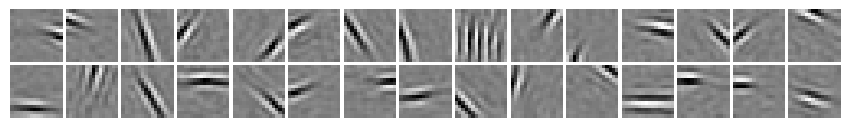

Running variable alpha_MP with value 0.4204


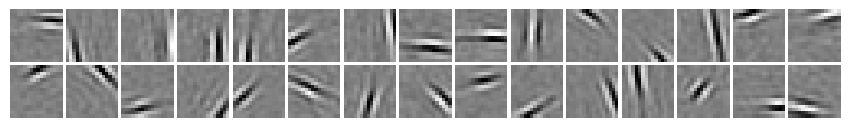

Running variable alpha_MP with value 0.5000


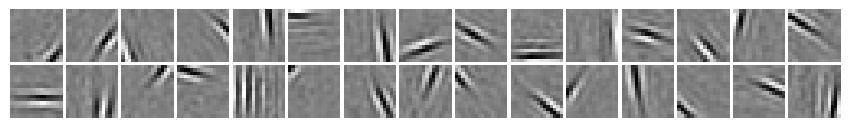

Running variable alpha_MP with value 0.5946


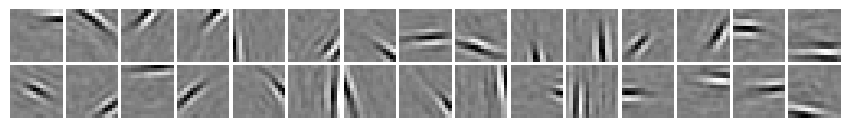

Running variable alpha_MP with value 0.7071


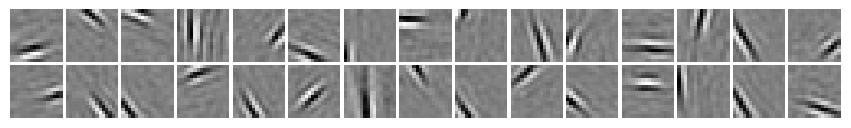

Running variable alpha_MP with value 0.8409


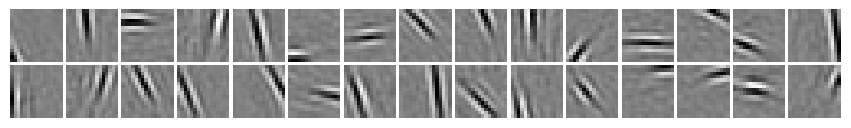

Running variable alpha_MP with value 1.0000


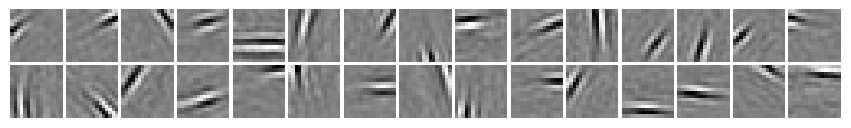

homeo_method= HEH
Running variable alpha_MP with value 0.2500


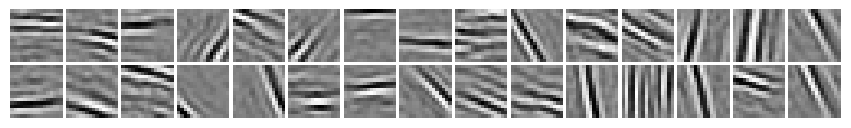

Running variable alpha_MP with value 0.2973


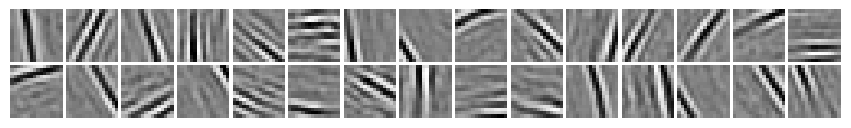

Running variable alpha_MP with value 0.3536


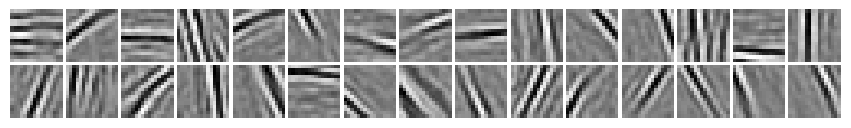

Running variable alpha_MP with value 0.4204


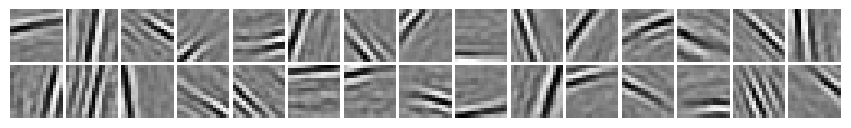

Running variable alpha_MP with value 0.5000


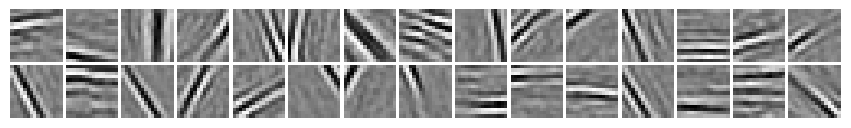

Running variable alpha_MP with value 0.5946


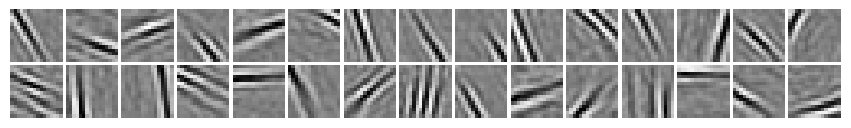

Running variable alpha_MP with value 0.7071


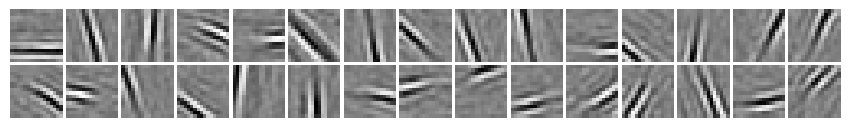

Running variable alpha_MP with value 0.8409


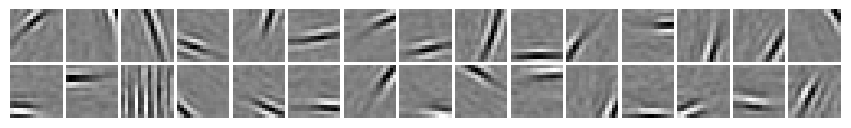

Running variable alpha_MP with value 1.0000


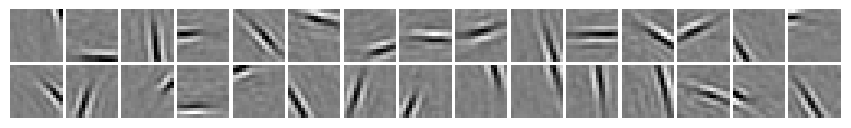

homeo_method= OLS
Running variable alpha_MP with value 0.2500


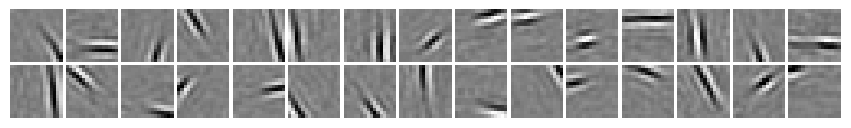

Running variable alpha_MP with value 0.2973


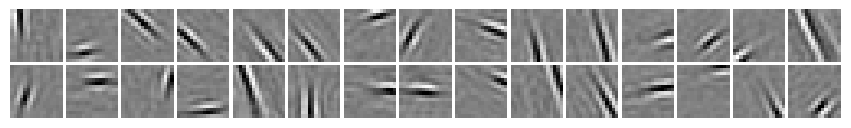

Running variable alpha_MP with value 0.3536


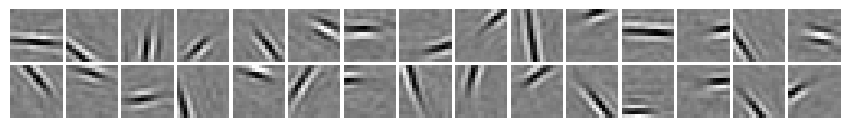

Running variable alpha_MP with value 0.4204


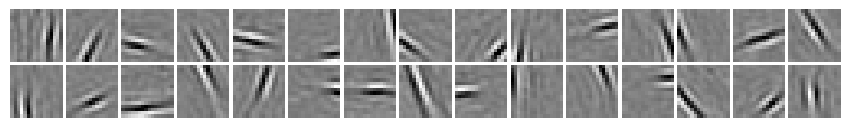

Running variable alpha_MP with value 0.5000


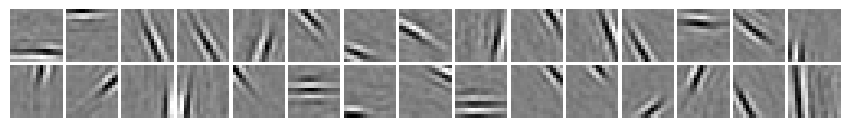

Running variable alpha_MP with value 0.5946


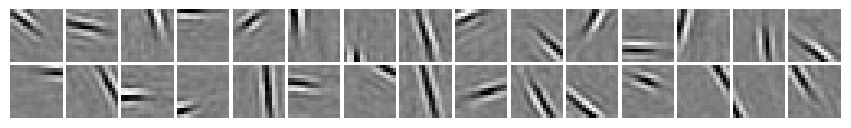

Running variable alpha_MP with value 0.7071


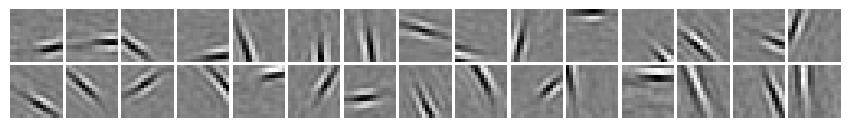

Running variable alpha_MP with value 0.8409


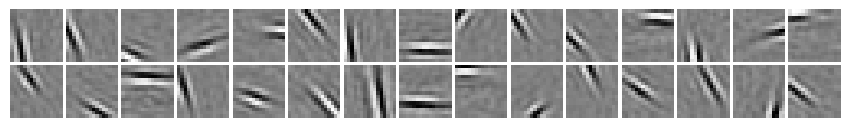

Running variable alpha_MP with value 1.0000


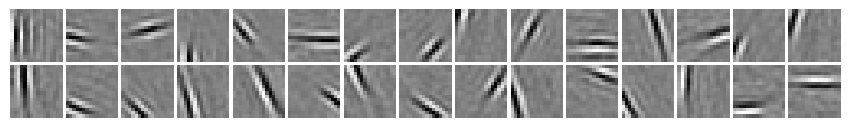

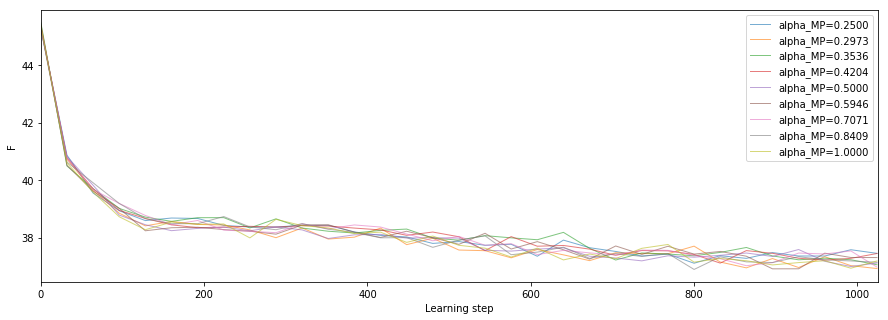

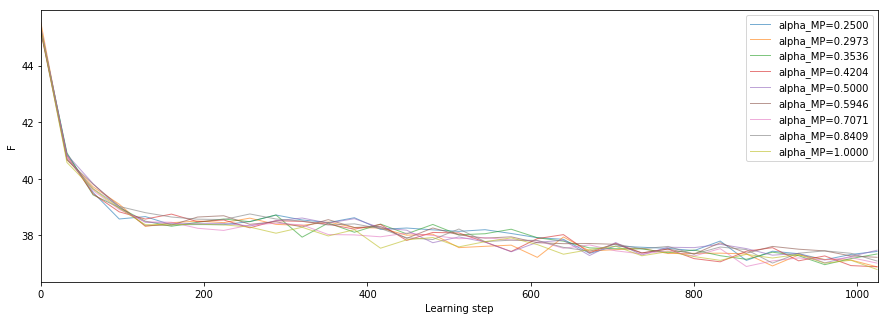

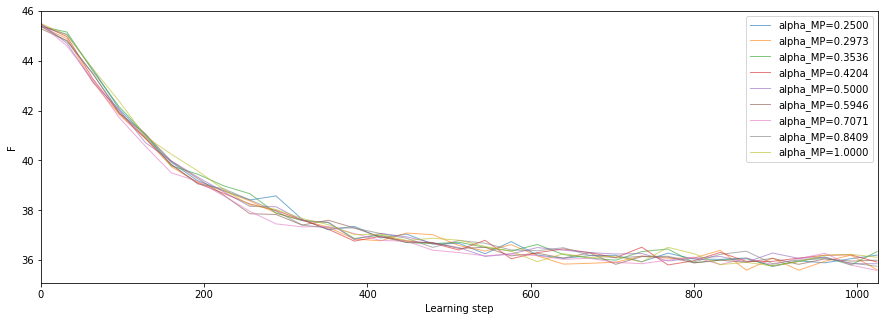

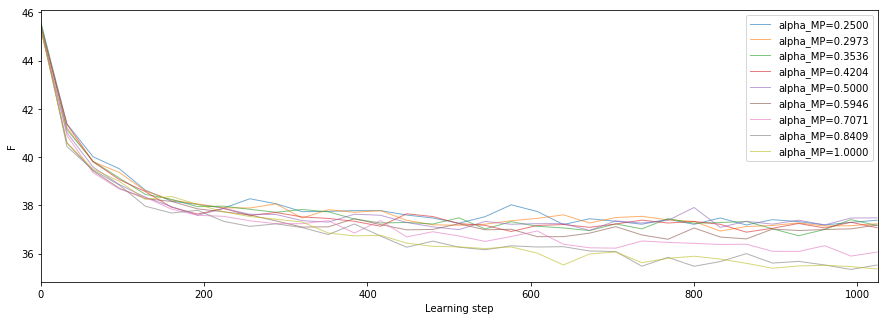

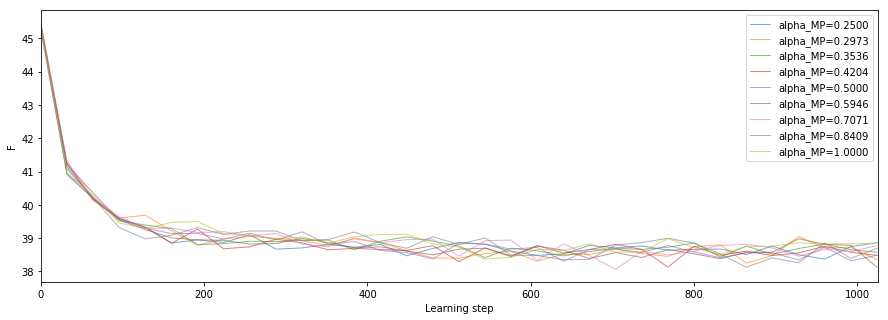

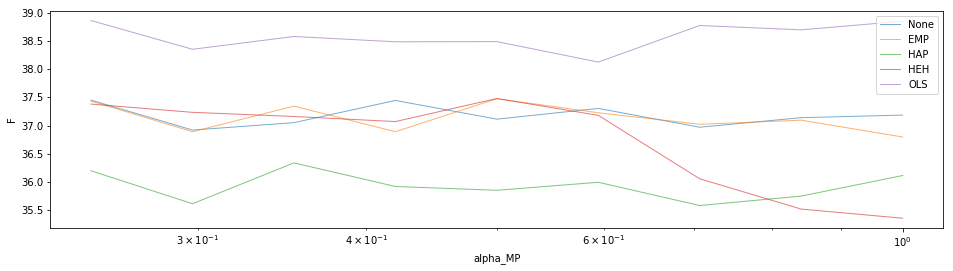

In [9]:
%run cache_dir/synthesis.py plot


tester:
- l0 sparseness avec MP et OMP

## Version used

In [10]:
# %load_ext version_information
%version_information shl_scripts, numpy, shl_scripts, pandas, matplotlib

UsageError: Line magic function `%version_information` not found.
